In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore

In [5]:
df=pd.read_csv('Telco_Customer_Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()
#There means having no NaN valaues in this dataframes

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

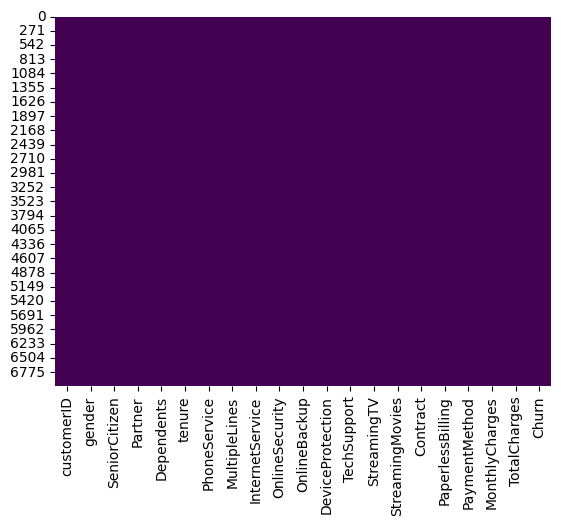

In [8]:
sns.heatmap(df.isna(), cbar=False, cmap= 'viridis')
plt.show
# There means having no NaN values in this dataframes as visulizations

In [9]:
print('shape of dataframes indexes and columns:',df.shape)
print('*'*20)
print('shape of dataframes index:', df.index)
print('*'*20)
for column_index in df.columns:
    print('All column_Names:', column_index)

shape of dataframes indexes and columns: (7043, 21)
********************
shape of dataframes index: RangeIndex(start=0, stop=7043, step=1)
********************
All column_Names: customerID
All column_Names: gender
All column_Names: SeniorCitizen
All column_Names: Partner
All column_Names: Dependents
All column_Names: tenure
All column_Names: PhoneService
All column_Names: MultipleLines
All column_Names: InternetService
All column_Names: OnlineSecurity
All column_Names: OnlineBackup
All column_Names: DeviceProtection
All column_Names: TechSupport
All column_Names: StreamingTV
All column_Names: StreamingMovies
All column_Names: Contract
All column_Names: PaperlessBilling
All column_Names: PaymentMethod
All column_Names: MonthlyCharges
All column_Names: TotalCharges
All column_Names: Churn


In [10]:
df.select_dtypes(exclude=[int, float]).iloc[0:4]

customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   

               PaymentMethod TotalCharges Churn  
0           Electronic check        29.85    No  
1               Mailed check       1889.5    No  
2               Mailed check       108.15   Yes  
3  Bank transfer (automatic)      1840.75    No

In [11]:
df.select_dtypes(exclude=[object])[12:15]

SeniorCitizen  tenure  MonthlyCharges
12              0      58          100.35
13              0      49          103.70
14              0      25          105.50

In [12]:
df=df.drop('customerID', axis= 1)
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 20 columns]

<Axes: xlabel='gender', ylabel='tenure'>

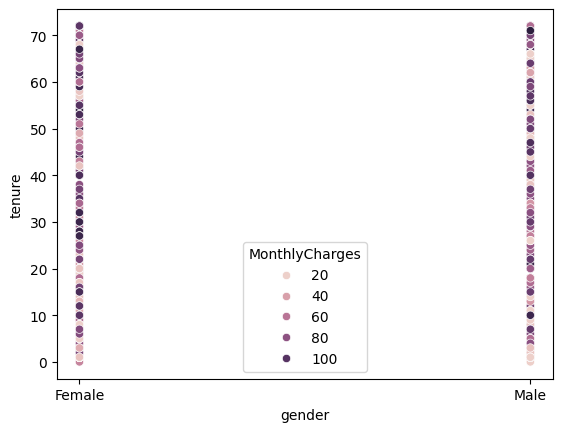

In [13]:
 # Multivariance Anaylsis:
sns.scatterplot(x= df['gender'].head(900), y=df['tenure'].head(900), hue=df['MonthlyCharges'].head(900))

#### we can't perform any visualtization and model perfomances so add on firstly encodeing techique for bulding model using encoding techquies  after going for visalization and model buildings

### 3.EDA

#### 3.1 Gender

In [14]:
df[['gender']].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [15]:
df['gender'].replace({'Male': 1, 'Female': 0}, inplace= True)
df['gender'].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

#### 3.2 SeniorCitizen

In [16]:
df['SeniorCitizen'].value_counts() 

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

#### 3.3 Partner

In [17]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [18]:
df['Partner'].replace({'No': 0, 'Yes': 1}, inplace= True)
df['Partner'].value_counts()

Partner
0    3641
1    3402
Name: count, dtype: int64

#### 3.4 Dependents

In [19]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [20]:
df['Dependents'].replace({'No': 0, 'Yes': 1}, inplace= True)
df['Dependents'].value_counts()

Dependents
0    4933
1    2110
Name: count, dtype: int64

#### 3.5 tenure

In [21]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

<Axes: xlabel='tenure', ylabel='Density'>

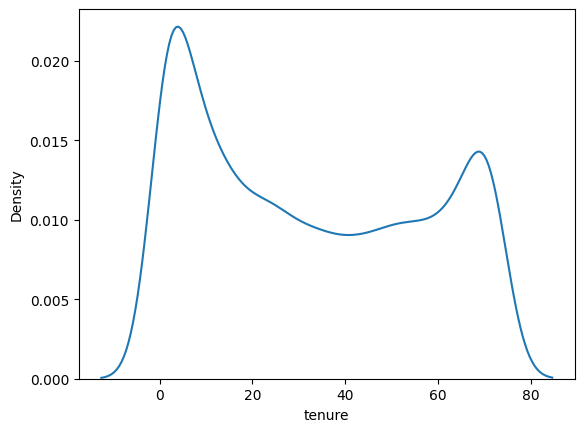

In [22]:
sns.kdeplot(df['tenure'])

In [23]:
q1=np.quantile(df['tenure'], 0.25)
q3= np.quantile(df['tenure'], 0.75)

print(f'q1 == {q1}, q3 == {q3}')

IQR= q3-q1
print('IQR:',IQR)
print('*'*20)
upper_tail = q3 + 1.5 * IQR
lower_tail= q1 - 1.5 * IQR

print('Upper Tail:', upper_tail)
print('Lower Tail:', lower_tail)
print('*'*20)
print(df['tenure'].mean())
print('*'*20)
print(df['tenure'].median())
print('*'*20)
print(df['tenure'].std())

q1 == 9.0, q3 == 55.0
IQR: 46.0
********************
Upper Tail: 124.0
Lower Tail: -60.0
********************
32.37114865824223
********************
29.0
********************
24.55948102309446


In [24]:
log_ten= np.log(df['tenure'])
sns.boxplot(log_ten, orient= 'h')

<Axes: xlabel='tenure'>

In [25]:
# yeo-johnson transformation

from scipy.stats import yeojohnson, boxcox
from sklearn.preprocessing import PowerTransformer

power_trans= PowerTransformer(method= 'yeo-johnson')
ten_yeo_johnson= power_trans.fit_transform(df[['tenure']])[:,0]
ten_yeo_johnson

power_trans.transform([[33]])
sns.boxplot(ten_yeo_johnson, orient= 'h')

<Axes: >

In [26]:
sqrt_ten= np.sqrt(df['tenure'])
sns.boxplot(sqrt_ten, orient= 'h')

sqrt_ten

0       1.000000
1       5.830952
2       1.414214
3       6.708204
4       1.414214
          ...   
7038    4.898979
7039    8.485281
7040    3.316625
7041    2.000000
7042    8.124038
Name: tenure, Length: 7043, dtype: float64

<Axes: xlabel='tenure'>

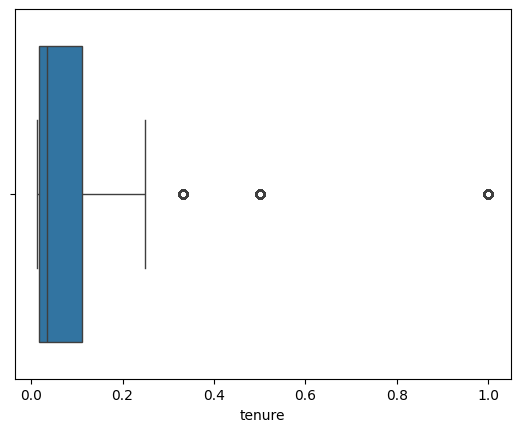

In [27]:
rec_ten= 1/ df['tenure']
sns.boxplot(rec_ten, orient= 'h')

In [28]:
cbrt_ten= np.cbrt(df['tenure'])
sns.boxplot(cbrt_ten, orient= 'h')


<Axes: xlabel='tenure'>

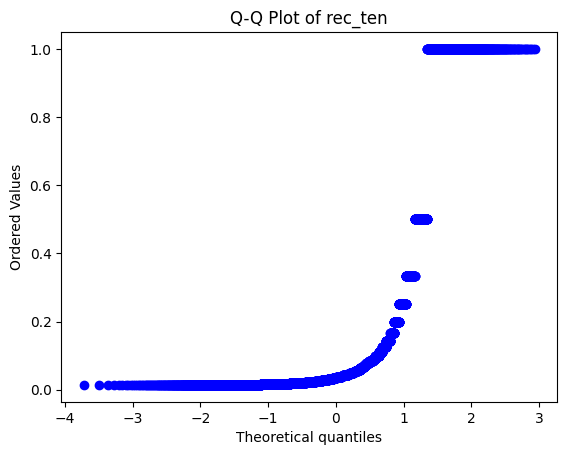

********************


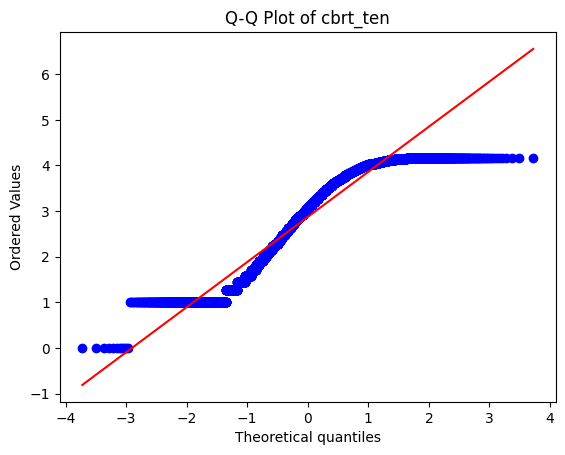

********************


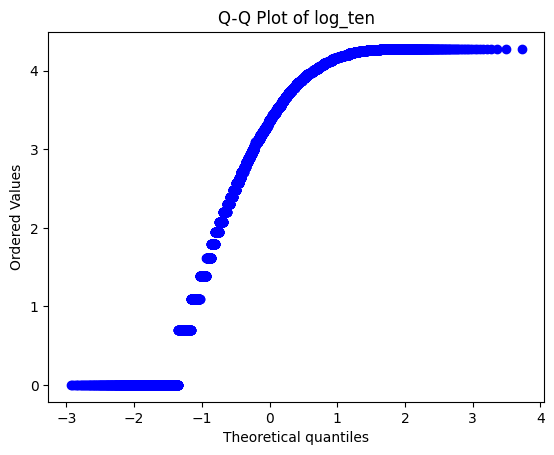

********************


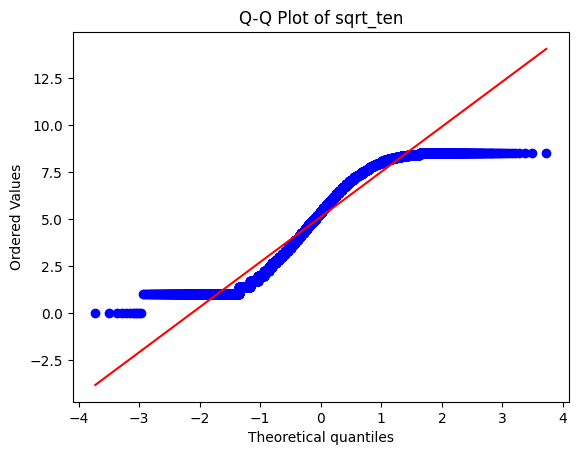

********************


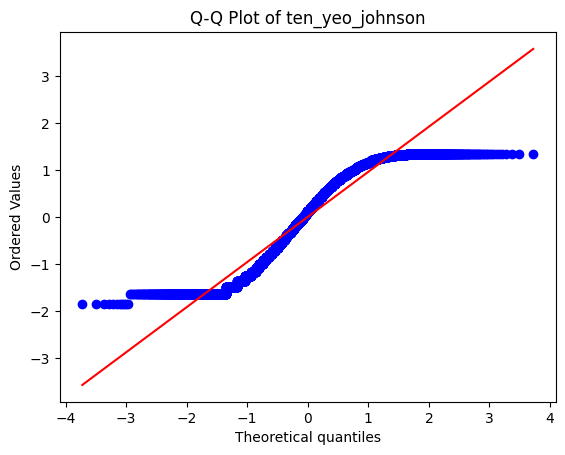

********************


In [29]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(rec_ten, dist= 'norm', plot= plt)
plt.title('Q-Q Plot of rec_ten')
plt.show()

print('*'*20)
stats.probplot(cbrt_ten, dist= 'norm', plot= plt)
plt.title('Q-Q Plot of cbrt_ten')
plt.show()
print('*'*20)

stats.probplot(log_ten, dist= 'norm', plot= plt)
plt.title('Q-Q Plot of log_ten')
plt.show()

print('*'*20)
stats.probplot(sqrt_ten, dist= 'norm', plot= plt)
plt.title('Q-Q Plot of sqrt_ten')
plt.show()

print('*'*20)
stats.probplot(ten_yeo_johnson, dist= 'norm', plot=plt)
plt.title('Q-Q Plot of ten_yeo_johnson')
plt.show()
print('*'*20)


#### 3.6 PhoneService

In [30]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [31]:
df['PhoneService'].replace({'Yes': 1, 'No': 0}, inplace= True)
df['PhoneService'].value_counts()

PhoneService
1    6361
0     682
Name: count, dtype: int64

#### 3.7 MultipleLines

In [32]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [33]:
df['MultipleLines'].replace({'Yes' : 1, 'No' : 0, 'No phone service': 0}, inplace= True)
df['MultipleLines'].value_counts()

MultipleLines
0    4072
1    2971
Name: count, dtype: int64

#### 3.8 InternetService

In [34]:
df['InternetService'] .value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [35]:
df=pd.get_dummies(df, columns=['InternetService'], dtype=int)
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines OnlineSecurity OnlineBackup DeviceProtection  ...  \
0              0             No          Yes               No  ...   
1              0            Yes           No              Yes  ...   
2              0            Yes          Yes               No  ...   
3              0            Yes           No              Yes  ...   
4              0             No           No               No  ...   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  MonthlyCharges TotalCharges  Churn InternetService_DSL  \
0          29.85        29.85     No                   1   
1          56.95       1889.5     No                   1   
2          53.85       108.15    Yes                   1   
3          42.30      1840.75     No                   1   
4          70.70       151.65    Yes                   0   

  InternetService_Fiber optic  InternetService_No  
0                           0                   0  
1                           0                   0  
2                           0                   0  
3                           0                   0  
4                           1                   0  

[5 rows x 22 columns]

#### 3.9 OnlineSecurity

In [36]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [37]:
df['OnlineSecurity'].replace({'No': 0, 'Yes' : 1, 'No internet service': 0}, inplace= True)
df['OnlineSecurity']

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    1
7041    0
7042    1
Name: OnlineSecurity, Length: 7043, dtype: int64

#### 3.10 OnlineBackup

In [38]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [39]:
df['OnlineBackup'].replace({'No': 0, 'Yes': 1, 'No internet service': 0}, inplace= True)
df['OnlineBackup'].value_counts()

OnlineBackup
0    4614
1    2429
Name: count, dtype: int64

#### 3.11 DeviceProtection

In [40]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [41]:
df['DeviceProtection'].replace({'No': 0, 'Yes': 1, 'No internet service': 0}, inplace= True)
df['DeviceProtection']

0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    1
Name: DeviceProtection, Length: 7043, dtype: int64

#### 3.12 TechSupport

In [42]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [43]:
df['TechSupport'].replace({'No': 0, 'Yes': 1, 'No internet service':0}, inplace= True)
df['TechSupport']

0       0
1       0
2       0
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    0
7042    1
Name: TechSupport, Length: 7043, dtype: int64

#### 3.13 StreamingTV

In [44]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [45]:
df['StreamingTV'].replace({'No': 0, 'Yes': 1, 'No internet service':0}, inplace= True)
df['StreamingTV']

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    1
Name: StreamingTV, Length: 7043, dtype: int64

#### 3.14 StreamingMovies

In [46]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [47]:
df['StreamingMovies'].replace({'No': 0, 'Yes': 1, 'No internet service':0}, inplace= True
                             )
df['StreamingMovies']

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    1
Name: StreamingMovies, Length: 7043, dtype: int64

#### 3.15 Contract

In [48]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [49]:
df=pd.get_dummies(df, columns=['Contract'], dtype= int)
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  \
0           Electronic check           29.85         29.85    No   
1               Mailed check           56.95        1889.5    No   
2               Mailed check           53.85        108.15   Yes   
3  Bank transfer (automatic)           42.30       1840.75    No   
4           Electronic check           70.70        151.65   Yes   

  InternetService_DSL  InternetService_Fiber optic InternetService_No  \
0                   1                            0                  0   
1                   1                            0                  0   
2                   1                            0                  0   
3                   1                            0                  0   
4                   0                            1                  0   

  Contract_Month-to-month  Contract_One year  Contract_Two year  
0                       1                  0                  0  
1                       0                  1                  0  
2                       1                  0                  0  
3                       0                  1                  0  
4                       1                  0                  0  

[5 rows x 24 columns]

#### 3.16 PaperlessBilling

In [50]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [51]:
df['PaperlessBilling'].replace({'Yes': 1, 'No': 0}, inplace= True)
df['PaperlessBilling']

0       1
1       0
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: PaperlessBilling, Length: 7043, dtype: int64

#### 3.17 PaymentMethod

In [52]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [53]:
df=pd.get_dummies(df, columns=['PaymentMethod'], dtype= int)
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year Contract_Two year  \
0                        1                  0                 0   
1                        0                  1                 0   
2                        1                  0                 0   
3                        0                  1                 0   
4                        1                  0                 0   

  PaymentMethod_Bank transfer (automatic)  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 27 columns]

#### 3.18 MonthlyCharges

In [54]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

<Axes: >

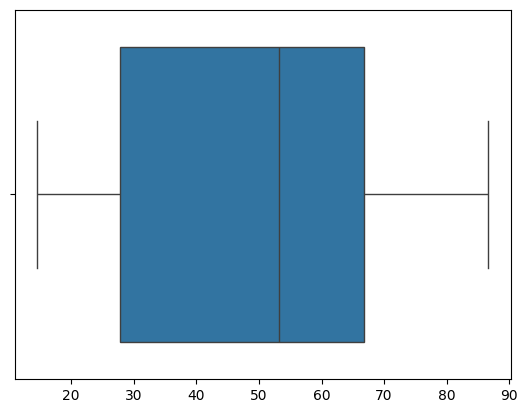

In [55]:
# Box - cox Transformation Techniques 
# skewed data to normally distributed Data 

array2= boxcox(df['MonthlyCharges'])[0]
pd.Series(array2).skew()
sns.boxplot(array2, orient= 'h')

<Axes: xlabel='MonthlyCharges'>

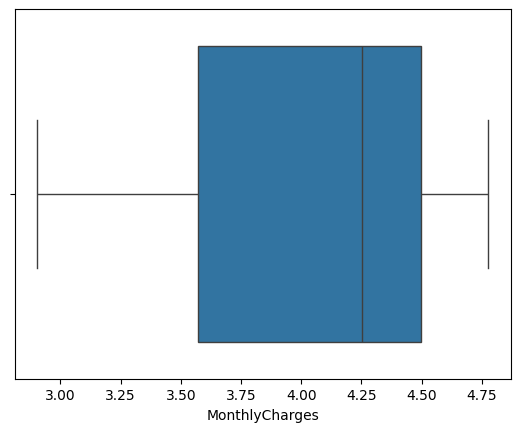

In [56]:
log_mon= np.log(df['MonthlyCharges'])
sns.boxplot(log_mon, orient= 'h')

In [57]:
power_trans= PowerTransformer(method= 'yeo-johnson')
mon_yeo_johnson= power_trans.fit_transform(df[['MonthlyCharges']])[:,0]
mon_yeo_johnson


power_trans.transform([[33]])
sns.boxplot(mon_yeo_johnson, orient= 'h')

<Axes: >

<Axes: xlabel='MonthlyCharges'>

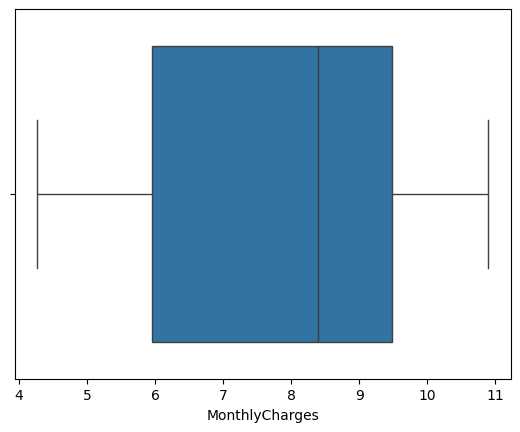

In [58]:
sqrt_mon= np.sqrt(df['MonthlyCharges'])
sns.boxplot(sqrt_mon, orient= 'h')


<Axes: xlabel='MonthlyCharges'>

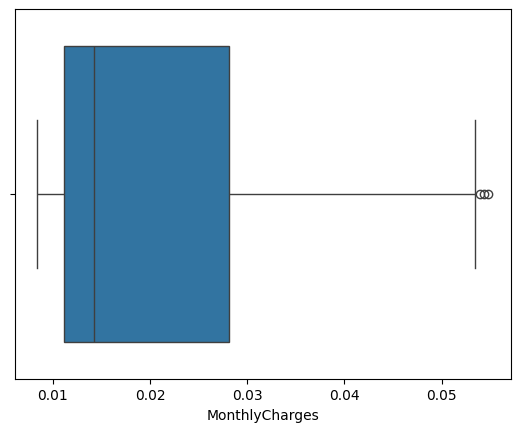

In [59]:
rec_mon= 1/ df['MonthlyCharges']
sns.boxplot(rec_mon, orient= 'h')


<Axes: xlabel='MonthlyCharges'>

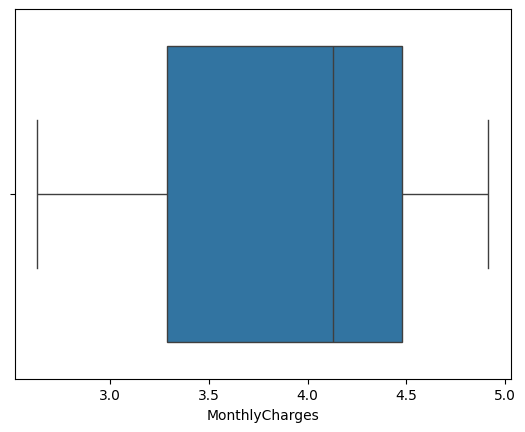

In [60]:
cbrt_mon= np.cbrt(df['MonthlyCharges'])
sns.boxplot(cbrt_mon, orient= 'h')

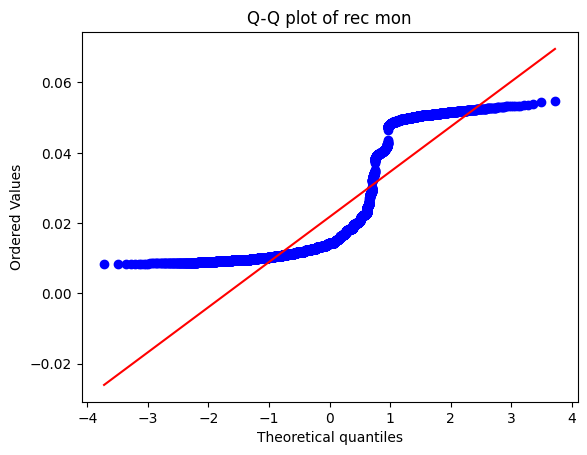

********************


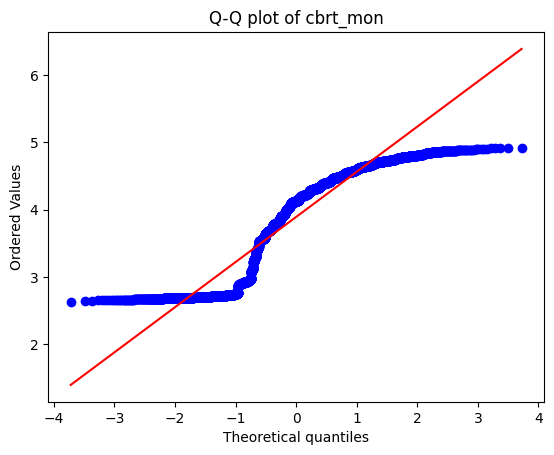

********************


********************


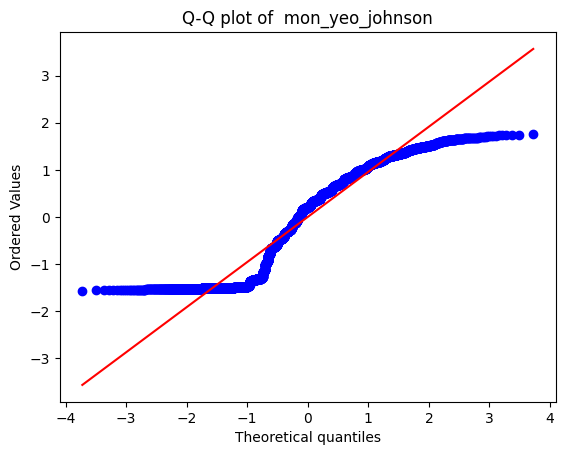

********************


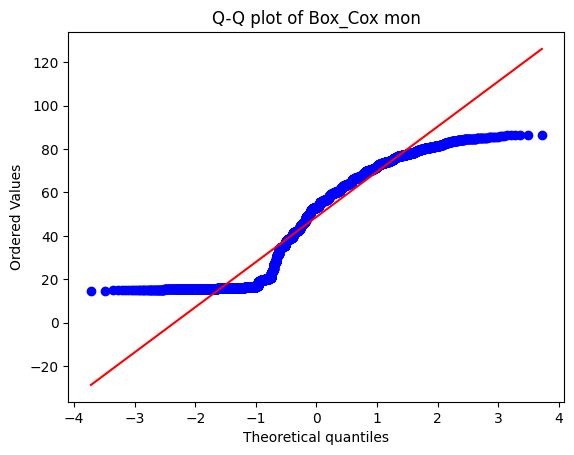

In [61]:
stats.probplot(rec_mon, dist= 'norm', plot= plt)
plt.title('Q-Q plot of rec mon')
plt.show()

print('*'*20)

stats.probplot(cbrt_mon , dist= 'norm', plot= plt)
plt.title('Q-Q plot of cbrt_mon')
plt.show()
print('*'*20)
stats.probplot(sqrt_mon, dist= 'norm', plot= plt)
plt.title('Q-Q plot of sqrt mon')
plt.show()
print('*'*20)

stats.probplot(mon_yeo_johnson, dist= 'norm', plot= plt)
plt.title('Q-Q plot of  mon_yeo_johnson')
plt.show()
print('*'*20)

stats.probplot(array2, dist= 'norm', plot= plt)
plt.title('Q-Q plot of Box_Cox mon')
plt.show()

#### 3.19 TotalCharges

In [62]:
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [63]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)


print(df['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


<Axes: xlabel='TotalCharges'>

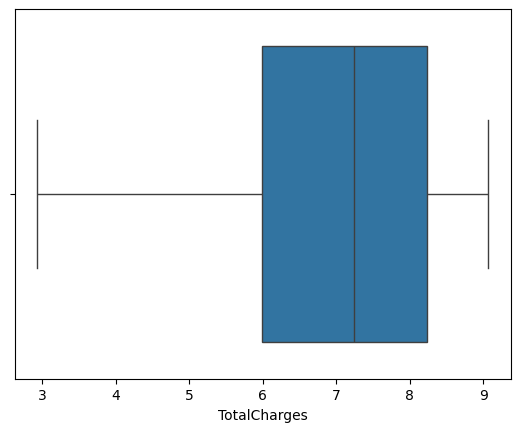

In [64]:
log_tot= np.log(df['TotalCharges'])
sns.boxplot(log_tot, orient= 'h')

<Axes: >

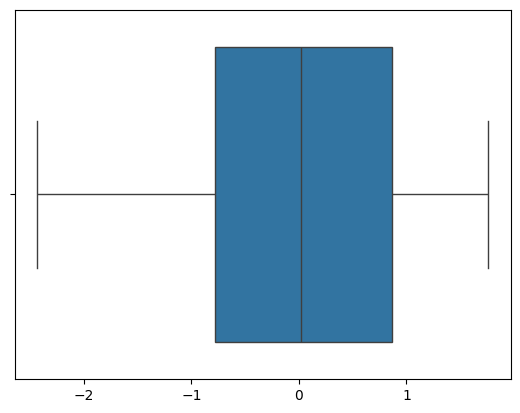

In [65]:
# yeo-johnson- transoformation
power_trans= PowerTransformer(method= 'yeo-johnson')
tot_yeo_johnson= power_trans.fit_transform(df[['TotalCharges']])[:,0]
power_trans.transform([[55]])
sns.boxplot(tot_yeo_johnson, orient= 'h')

<Axes: xlabel='TotalCharges'>

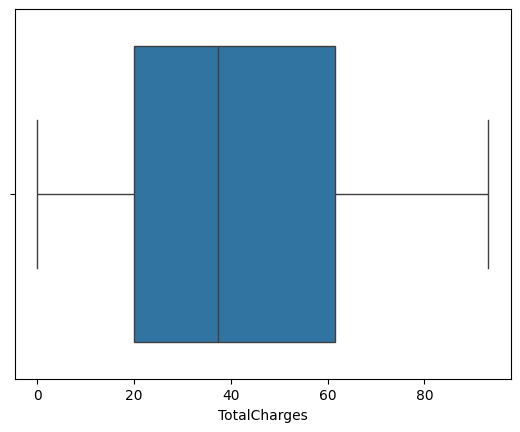

In [66]:
sqrt_tot= np.sqrt(df['TotalCharges'])
sns.boxplot(sqrt_tot, orient= 'h')

<Axes: xlabel='TotalCharges'>

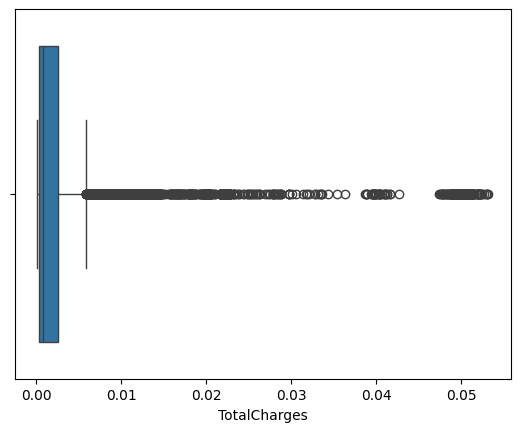

In [67]:
rec_tot= 1/ df['TotalCharges']
sns.boxplot(rec_tot, orient= 'h')

In [68]:
cbrt_tot= np.cbrt(df['TotalCharges'])
sns.boxplot(cbrt_tot, orient= 'h')


<Axes: xlabel='TotalCharges'>

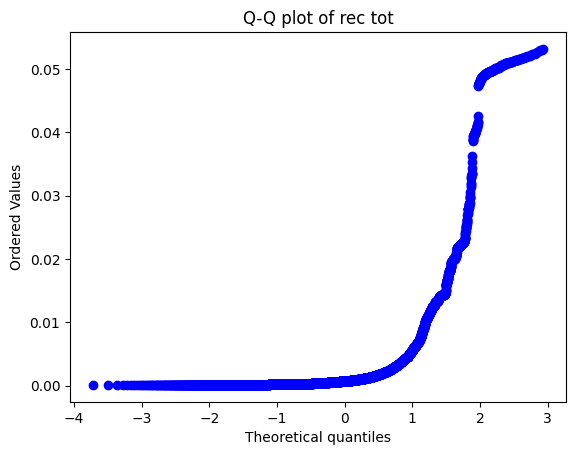

********************


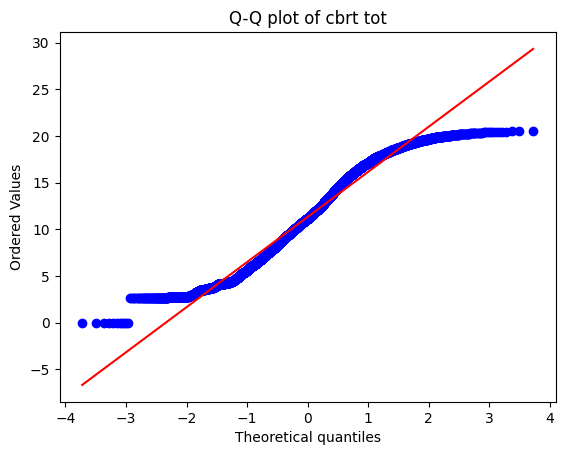

********************


********************


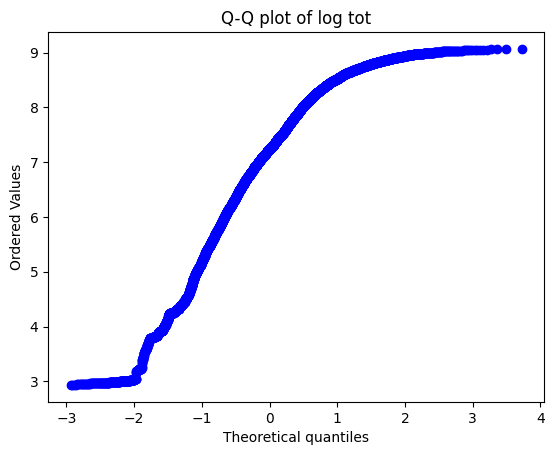

********************


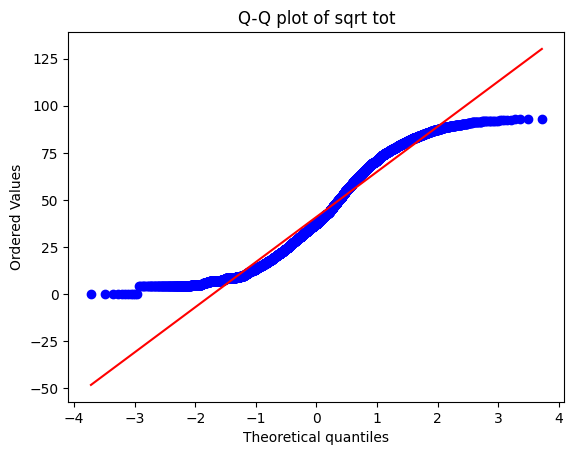

In [69]:
stats.probplot(rec_tot, dist= 'norm', plot= plt)
plt.title('Q-Q plot of rec tot')
plt.show()
print('*'*20)


stats.probplot(cbrt_tot, dist= 'norm', plot=plt)
plt.title('Q-Q plot of cbrt tot')
plt.show()
print('*'*20)
stats.probplot(tot_yeo_johnson, dist= 'norm', plot= plt)
plt.title('Q-Q plot of tot yeo johnson')
plt.show()
print('*'* 20)

stats.probplot(log_tot, dist= 'norm', plot= plt)
plt.title('Q-Q plot of log tot')
plt.show()
print('*'*20)

stats.probplot(sqrt_tot, dist= 'norm', plot=plt)
plt.title('Q-Q plot of sqrt tot')
plt.show()

#### 3.20 Churn

In [70]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [71]:
df['Churn'].replace({'No': 0, 'Yes': 1}, inplace= True)
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

#### Visualization 

skewness of gender gender   -0.019031
dtype: float64
********************


array([0, 1])

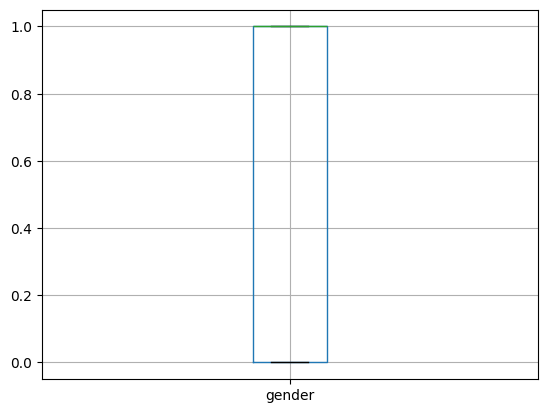

In [73]:
df[['gender']].boxplot()

print('skewness of gender', df[['gender']].skew())
print('*'*20)

df['gender'].unique()

<Axes: xlabel='gender'>

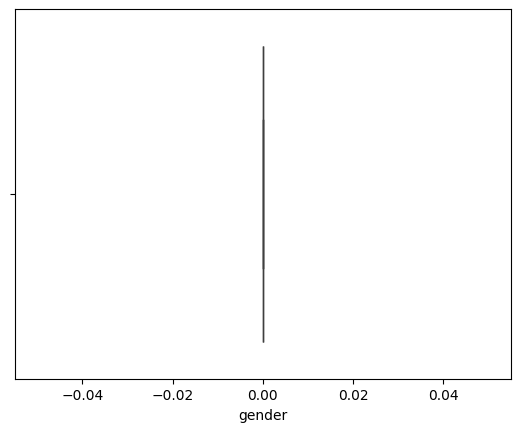

In [74]:
log_gen= np.log(df['gender'])

sns.boxplot(log_gen, orient= 'h')

<Axes: >

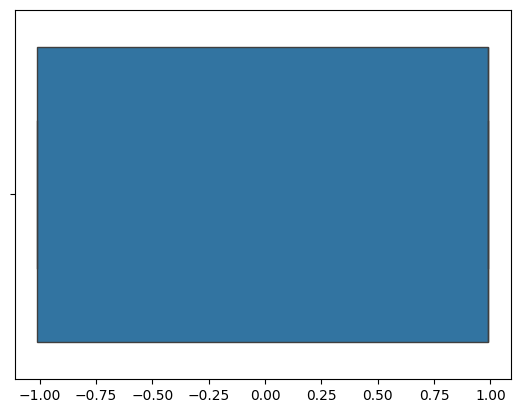

In [75]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer

power_trans= PowerTransformer(method= 'yeo-johnson')
gender_yeo_johnson= power_trans.fit_transform(df[['gender']])[:,0]
gender_yeo_johnson

power_trans.transform([[20]])
sns.boxplot(gender_yeo_johnson, orient= 'h')

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
7038    1.0
7039    0.0
7040    0.0
7041    1.0
7042    1.0
Name: gender, Length: 7043, dtype: float64

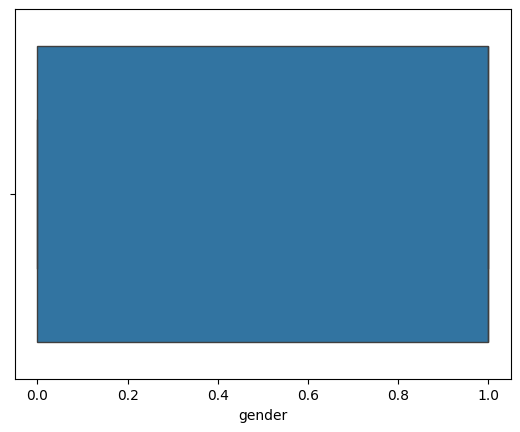

In [76]:
sqrt_gen= np.sqrt(df['gender'])
sns.boxplot(sqrt_gen, orient= 'h')

sqrt_gen

<Axes: xlabel='gender'>

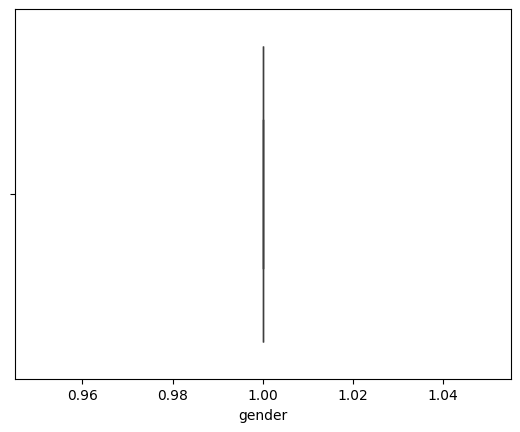

In [77]:
rec_gen= 1/df['gender']
sns.boxplot(rec_gen, orient= 'h')

<Axes: xlabel='gender'>

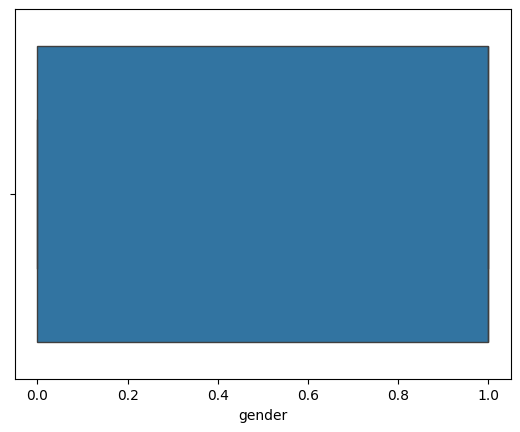

In [78]:
cbrt_gen= np.cbrt(df['gender'])
sns.boxplot(cbrt_gen, orient= 'h')

********************


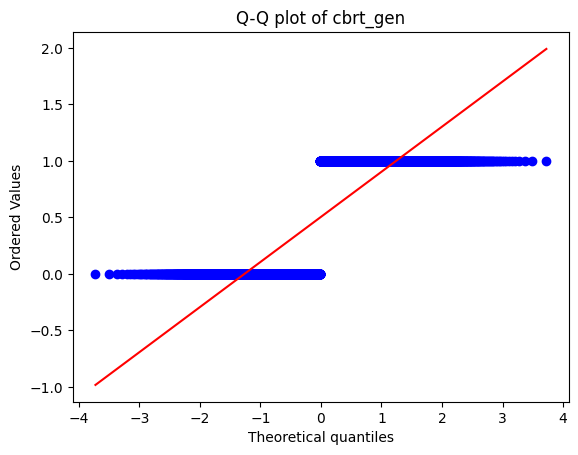

********************


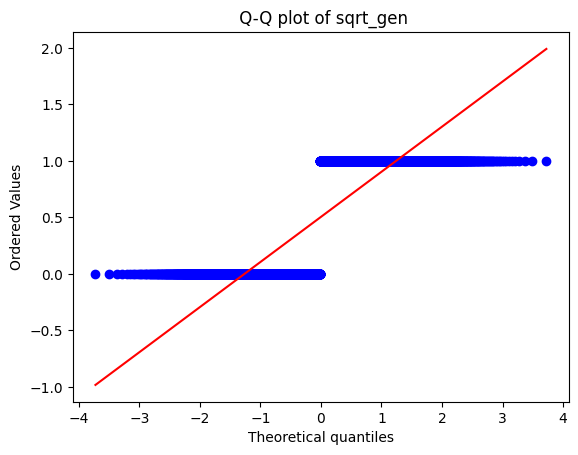

********************


Text(0.5, 1.0, 'Q-Q plot of gender_yeo_johnson')

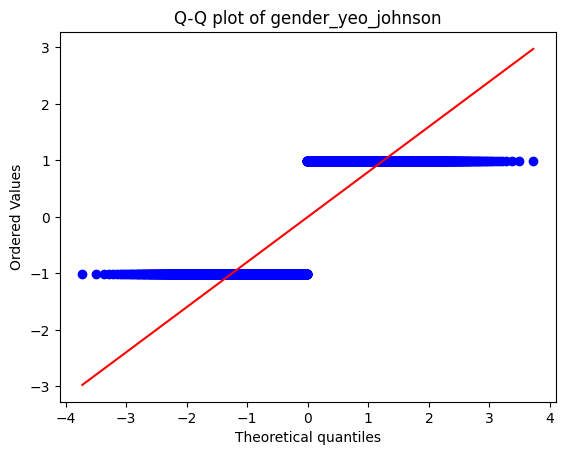

In [79]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(rec_gen, dist= 'norm', plot= plt)
plt.title('Q-Q plot of rec_gen')
plt.show()
print('*'*20)

stats.probplot(cbrt_gen, dist= 'norm', plot= plt)
plt.title('Q-Q plot of cbrt_gen')
plt.show()

print('*'*20)

stats.probplot(sqrt_gen, dist= 'norm', plot= plt)
plt.title(' Q-Q plot of sqrt_gen')
plt.show()
print('*'*20)

stats.probplot(gender_yeo_johnson, dist= 'norm', plot= plt)
plt.title('Q-Q plot of gender_yeo_johnson')

skewness of SeniorCitizen: SeniorCitizen    1.833633
dtype: float64
********************
q1== 0.0, q3==0.0
IQR: 0.0
********************
Upper Tail : 0.0
Lower Tail: 0.0
********************
0.1621468124378816
********************
0.0
********************
0.3686116056100131


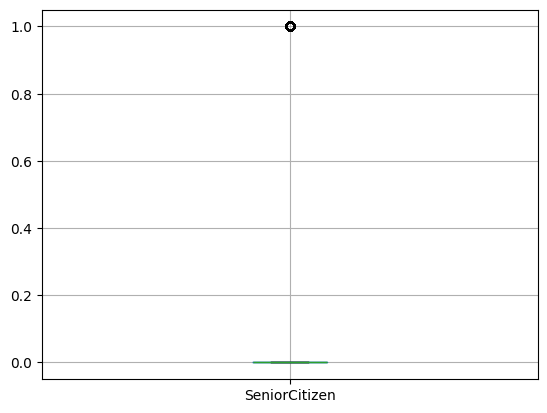

In [80]:
df[['SeniorCitizen']].boxplot()
print('skewness of SeniorCitizen:', df[['SeniorCitizen']].skew())
print('*'*20)


q1= np.quantile(df['SeniorCitizen'], 0.25)
q3=np.quantile(df['SeniorCitizen'], 0.75)

print(f'q1== {q1}, q3=={q3}')


IQR = q3-q1

print('IQR:', IQR)
print('*'* 20)
upper_tail= q3 + 1.5 * IQR
lower_tail= q1 - 1.5 * IQR

print('Upper Tail :', upper_tail)
print('Lower Tail:', lower_tail)

print('*'*20)
print(df['SeniorCitizen'].mean())
print('*'*20)
print(df['SeniorCitizen'].median())
print('*'*20)
print(df['SeniorCitizen'].std())

<Axes: xlabel='SeniorCitizen', ylabel='Density'>

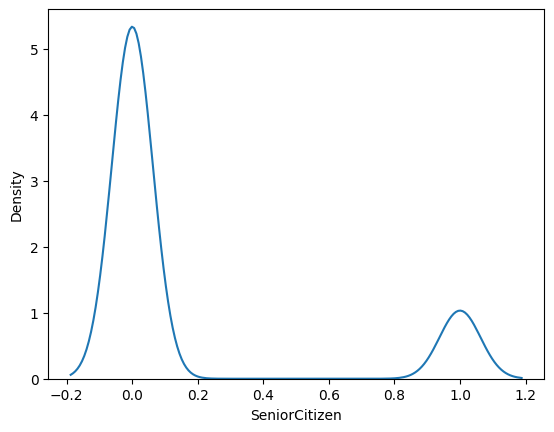

In [81]:
sns.kdeplot(df['SeniorCitizen'])

<Axes: xlabel='SeniorCitizen'>

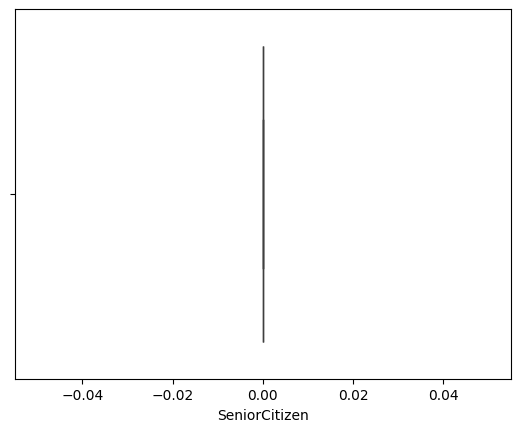

In [82]:
log_sen= np.log(df['SeniorCitizen'])
sns.boxplot(log_sen, orient= 'h')

<Axes: >

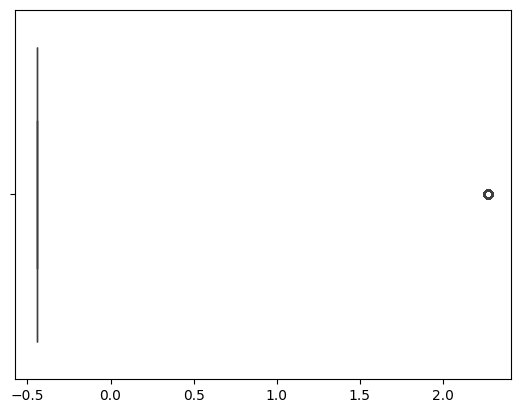

In [83]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer
power_trans= PowerTransformer(method= 'yeo-johnson')
sen_yeo_johnson= power_trans.fit_transform(df[['SeniorCitizen']])[:, 0]
sen_yeo_johnson
power_trans.transform([[29]])
sns.boxplot(sen_yeo_johnson, orient= 'h')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: SeniorCitizen, Length: 7043, dtype: float64

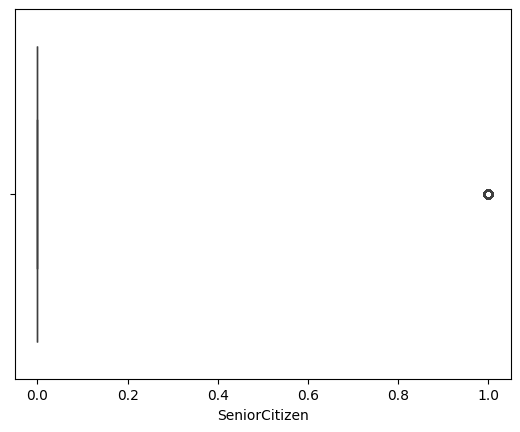

In [84]:
sqrt_sen= np.sqrt(df['SeniorCitizen'])
sns.boxplot(sqrt_sen, orient= 'h')
sqrt_sen

<Axes: xlabel='SeniorCitizen'>

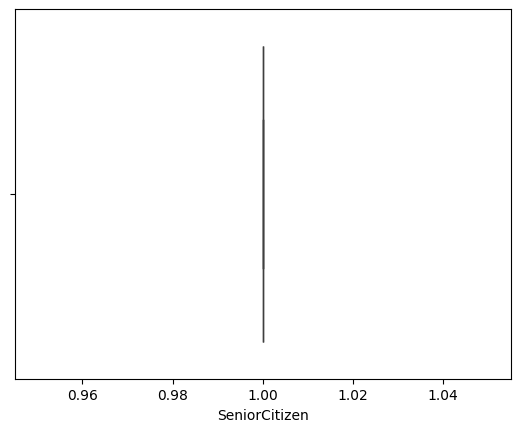

In [85]:
rec_sen= 1/ df['SeniorCitizen']
sns.boxplot(rec_sen, orient= 'h')

<Axes: xlabel='SeniorCitizen'>

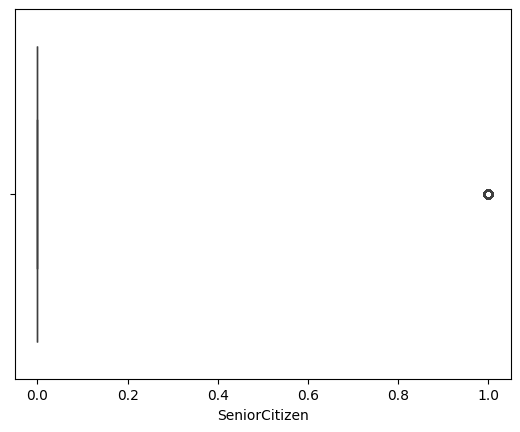

In [86]:
cbrt_sen= np.cbrt(df['SeniorCitizen'])
sns.boxplot(cbrt_sen, orient= 'h')


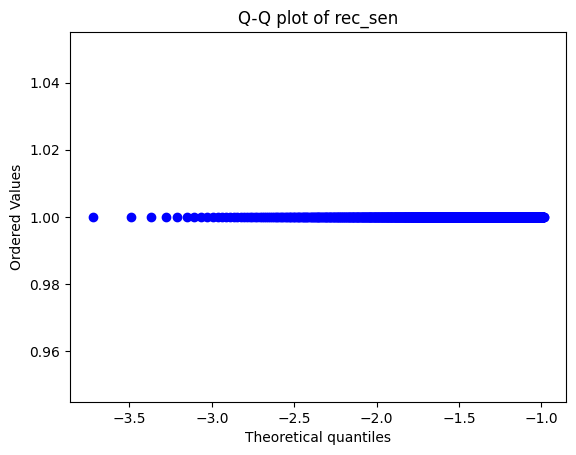

********************


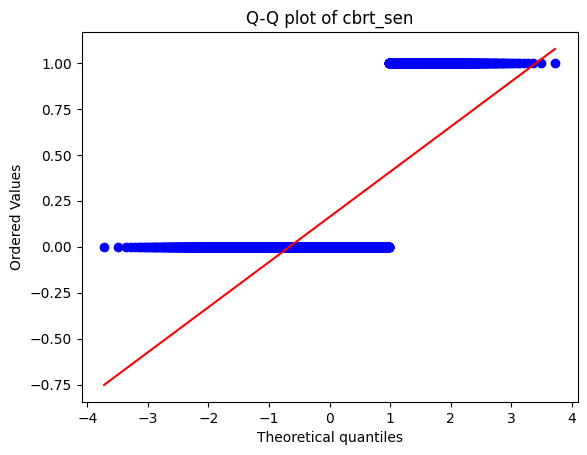

********************


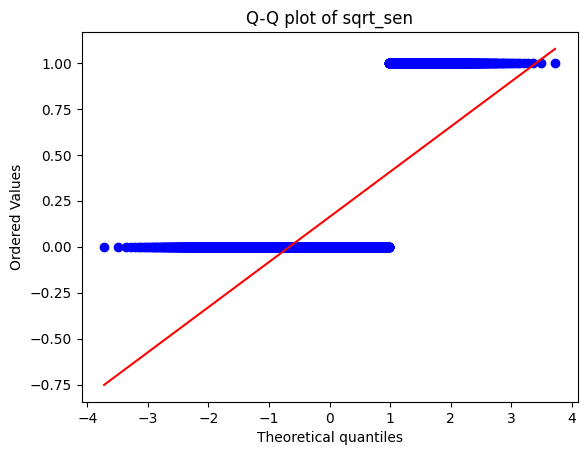

********************


Text(0.5, 1.0, 'Q-Q plot of sen_yeo_johnson')

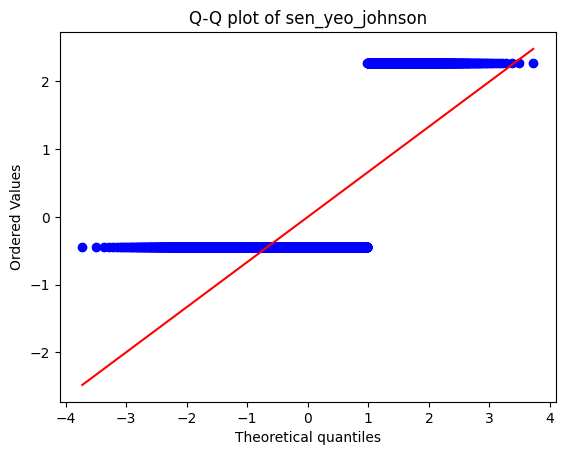

In [87]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(rec_sen, dist= 'norm', plot= plt)
plt.title('Q-Q plot of rec_sen')
plt.show()
print('*'*20)

stats.probplot(cbrt_sen, dist= 'norm', plot= plt)
plt.title('Q-Q plot of cbrt_sen')
plt.show()

print('*'*20)

stats.probplot(sqrt_sen, dist= 'norm', plot= plt)
plt.title('Q-Q plot of sqrt_sen')
plt.show()
print('*'*20)

stats.probplot(sen_yeo_johnson, dist= 'norm', plot= plt)
plt.title('Q-Q plot of sen_yeo_johnson')

skewness of partner: Partner    0.067922
dtype: float64


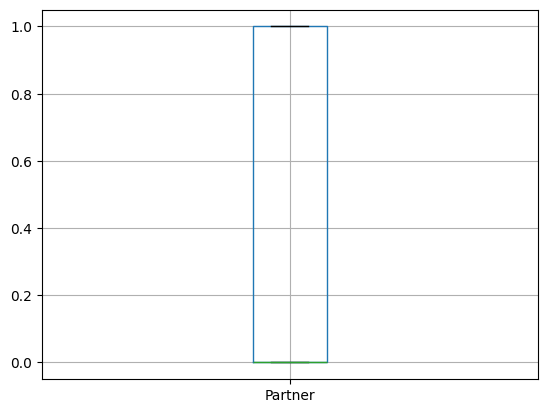

In [88]:
df[['Partner']].boxplot()
print('skewness of partner:', df[['Partner']].skew())

Axes(0.125,0.11;0.775x0.77)
Skewness of Dependents: Dependents    0.875199
dtype: float64
********************


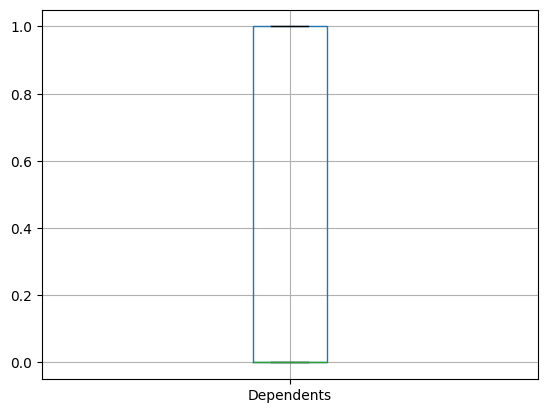

In [89]:
print(df[['Dependents']].boxplot())
print('Skewness of Dependents:', df[['Dependents']].skew())
print('*'*20)


In [90]:

df[['tenure']].boxplot()
print('Skewness of tenure:', df[['tenure']].skew())
print('*'*20)



q1= np.quantile(df['tenure'], 0.25)
q3=np.quantile(df['tenure'], 0.75)

print(f'q1== {q1}, q3=={q3}')


IQR = q3-q1

print('IQR:', IQR)
print('*'* 20)
upper_tail= q3 + 1.5 * IQR
lower_tail= q1 - 1.5 * IQR

print('Upper Tail :', upper_tail)
print('Lower Tail:', lower_tail)

print('*'*20)
print(df['tenure'].mean())
print('*'*20)
print(df['tenure'].median())
print('*'*20)
print(df['tenure'].std())

Skewness of tenure: tenure    0.23954
dtype: float64
********************
q1== 9.0, q3==55.0
IQR: 46.0
********************
Upper Tail : 124.0
Lower Tail: -60.0
********************
32.37114865824223
********************
29.0
********************
24.55948102309446


Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************


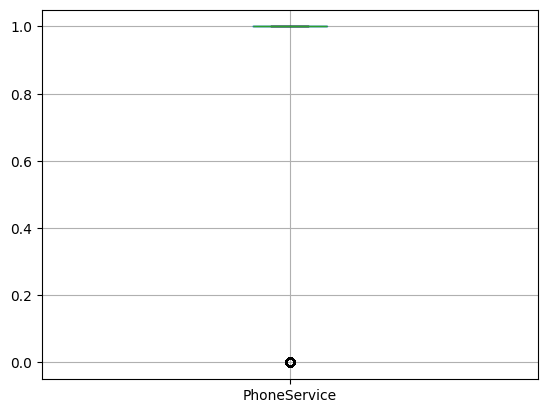

In [91]:
df[['PhoneService']].boxplot()
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)

Skewness of OnlineSecurity: OnlineSecurity    0.943722
dtype: float64
********************


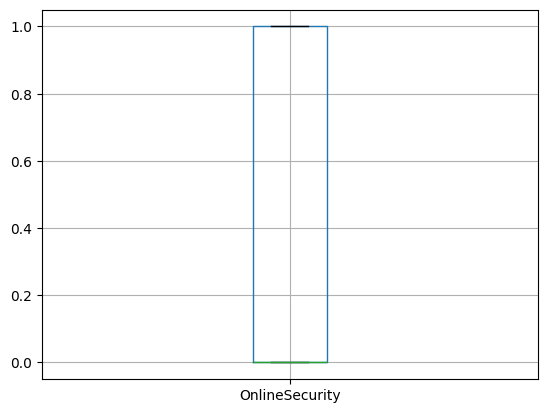

In [92]:

df[['OnlineSecurity']].boxplot()
print('Skewness of OnlineSecurity:', df[['OnlineSecurity']].skew())
print('*'*20)

In [93]:

df[['OnlineBackup']].boxplot()
print('Skewness of OnlineBackup:', df[['OnlineBackup']].skew())
print('*'*20)

Skewness of OnlineBackup: OnlineBackup    0.652817
dtype: float64
********************


In [94]:

df[['tenure']].boxplot()
print('Skewness of tenure:', df[['tenure']].skew())
print('*'*20)

Skewness of tenure: tenure    0.23954
dtype: float64
********************


Skewness of MonthlyCharges: MonthlyCharges   -0.220524
dtype: float64
********************


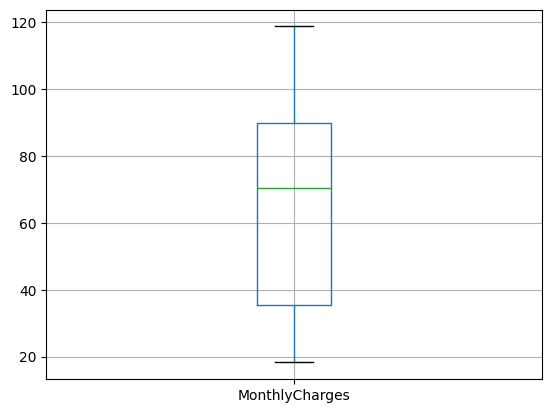

In [95]:
df[['MonthlyCharges']].boxplot()
print('Skewness of MonthlyCharges:', df[['MonthlyCharges']].skew())
print('*'*20)

In [96]:
df['TotalCharges']= df['TotalCharges'].replace('', 0)
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors= 'coerce')
df['TotalCharges']= df['TotalCharges'].fillna(0)
df['TotalCharges']= df['TotalCharges'].astype(float)

print('*'*20)


q1= np.quantile(df['TotalCharges'], 0.25)
q3=np.quantile(df['TotalCharges'], 0.75)

print(f'q1== {q1}, q3=={q3}')


IQR = q3-q1

print('IQR:', IQR)
print('*'* 20)
upper_tail= q3 + 1.5 * IQR
lower_tail= q1 - 1.5 * IQR

print('Upper Tail :', upper_tail)
print('Lower Tail:', lower_tail)

print('*'*20)
print(df['TotalCharges'].mean())
print('*'*20)
print(df['TotalCharges'].median())
print('*'*20)
print(df['TotalCharges'].std())

********************
q1== 398.55, q3==3786.6
IQR: 3388.0499999999997
********************
Upper Tail : 8868.675
Lower Tail: -4683.525
********************
2279.7343035638223
********************
1394.55
********************
2266.7944696890213


<Axes: xlabel='TotalCharges', ylabel='Density'>

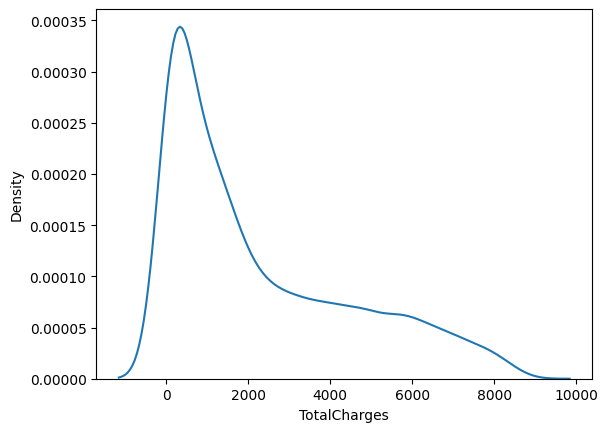

In [97]:
sns.kdeplot(df['TotalCharges'])

Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************


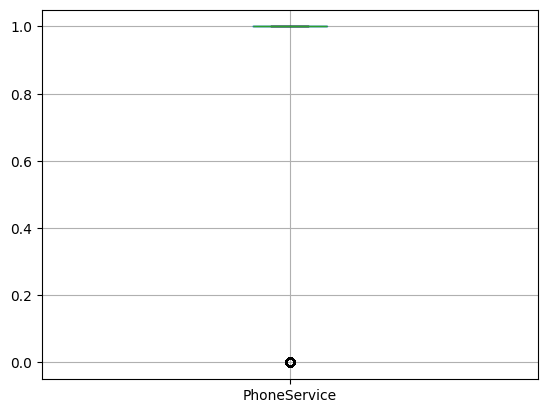

In [98]:
df[['PhoneService']].boxplot()
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)

Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************


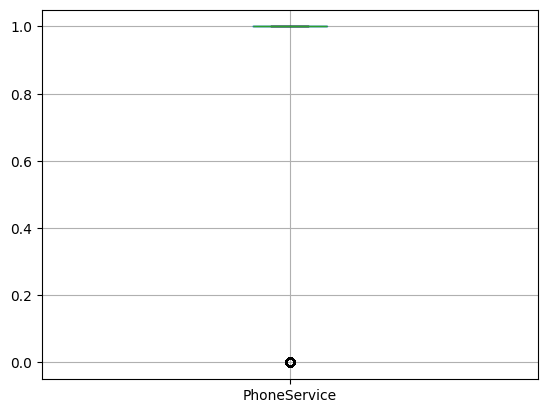

In [99]:

df[['PhoneService']].boxplot()
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)

Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************


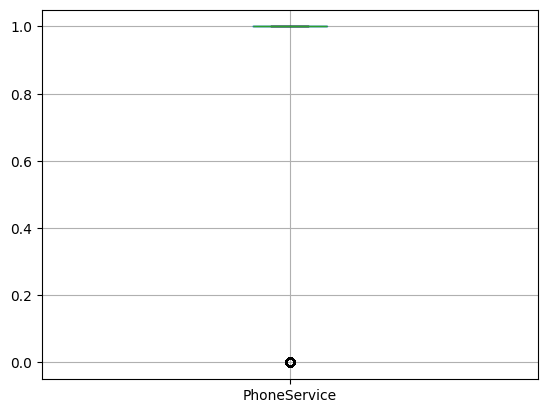

In [100]:
df[['PhoneService']].boxplot()
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)

Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************


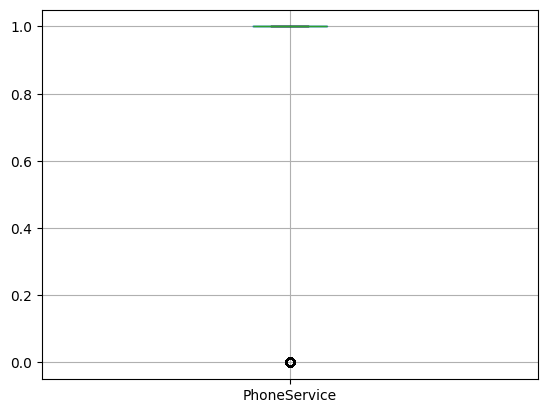

In [101]:
df[['PhoneService']].boxplot()
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)

Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************


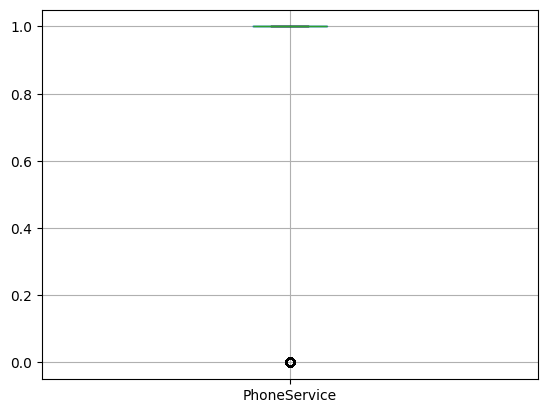

In [102]:
df[['PhoneService']].boxplot()
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)

Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************


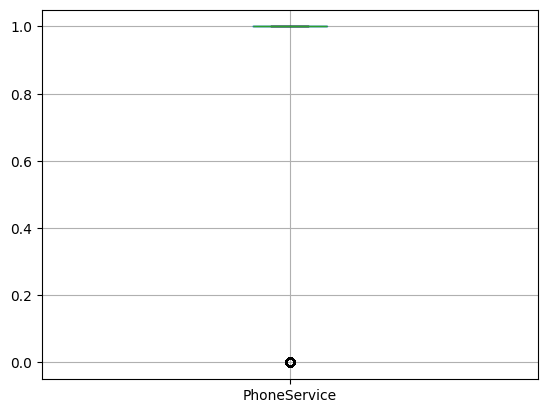

In [103]:
df[['PhoneService']].boxplot()
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)

Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************
q1== 1.0, q3==1.0
IQR: 0.0
********************
Upper Tail : 1.0
Lower Tail: 1.0
********************
0.9031662643759761
********************
1.0
********************
0.29575223178363474


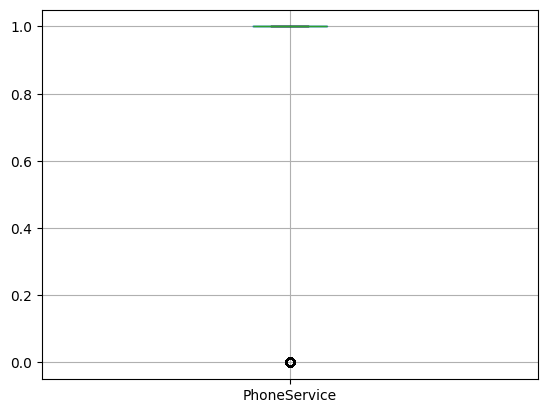

In [104]:

df[['PhoneService']].boxplot()
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)



q1= np.quantile(df['PhoneService'], 0.25)
q3=np.quantile(df['PhoneService'], 0.75)

print(f'q1== {q1}, q3=={q3}')


IQR = q3-q1

print('IQR:', IQR)
print('*'* 20)
upper_tail= q3 + 1.5 * IQR
lower_tail= q1 - 1.5 * IQR

print('Upper Tail :', upper_tail)
print('Lower Tail:', lower_tail)

print('*'*20)
print(df['PhoneService'].mean())
print('*'*20)
print(df['PhoneService'].median())
print('*'*20)
print(df['PhoneService'].std())

Skewness of PhoneService: PhoneService   -2.727153
dtype: float64
********************


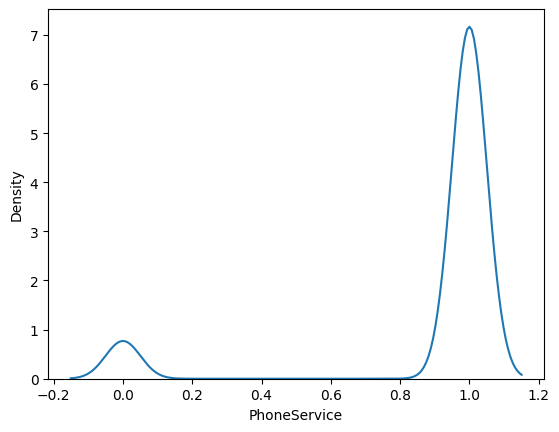

In [105]:

sns.kdeplot(df['PhoneService'])
print('Skewness of PhoneService:', df[['PhoneService']].skew())
print('*'*20)

In [106]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['tenure', 'MonthlyCharges', 'TotalCharges']].iloc[30 : 3000], figsize=(8,6))
plt.suptitle('The Scatter Matrix of tenure, TotalCharges & MontlyCharges')
plt.show()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [108]:
dist_gen_ten= plt.figure(figsize= (7,6))
ra1= dist_gen_ten.add_subplot(1,2,1)
ra2=dist_gen_ten.add_subplot(1,2,2)

ra1.hist(df['gender'])
ra1.set_title('The Distriburion of gender')

ra2.hist(df['tenure'], color= 'skyblue')
ra2.set_title('The Distribution of tenure')

plt.tight_layout()
plt.show()

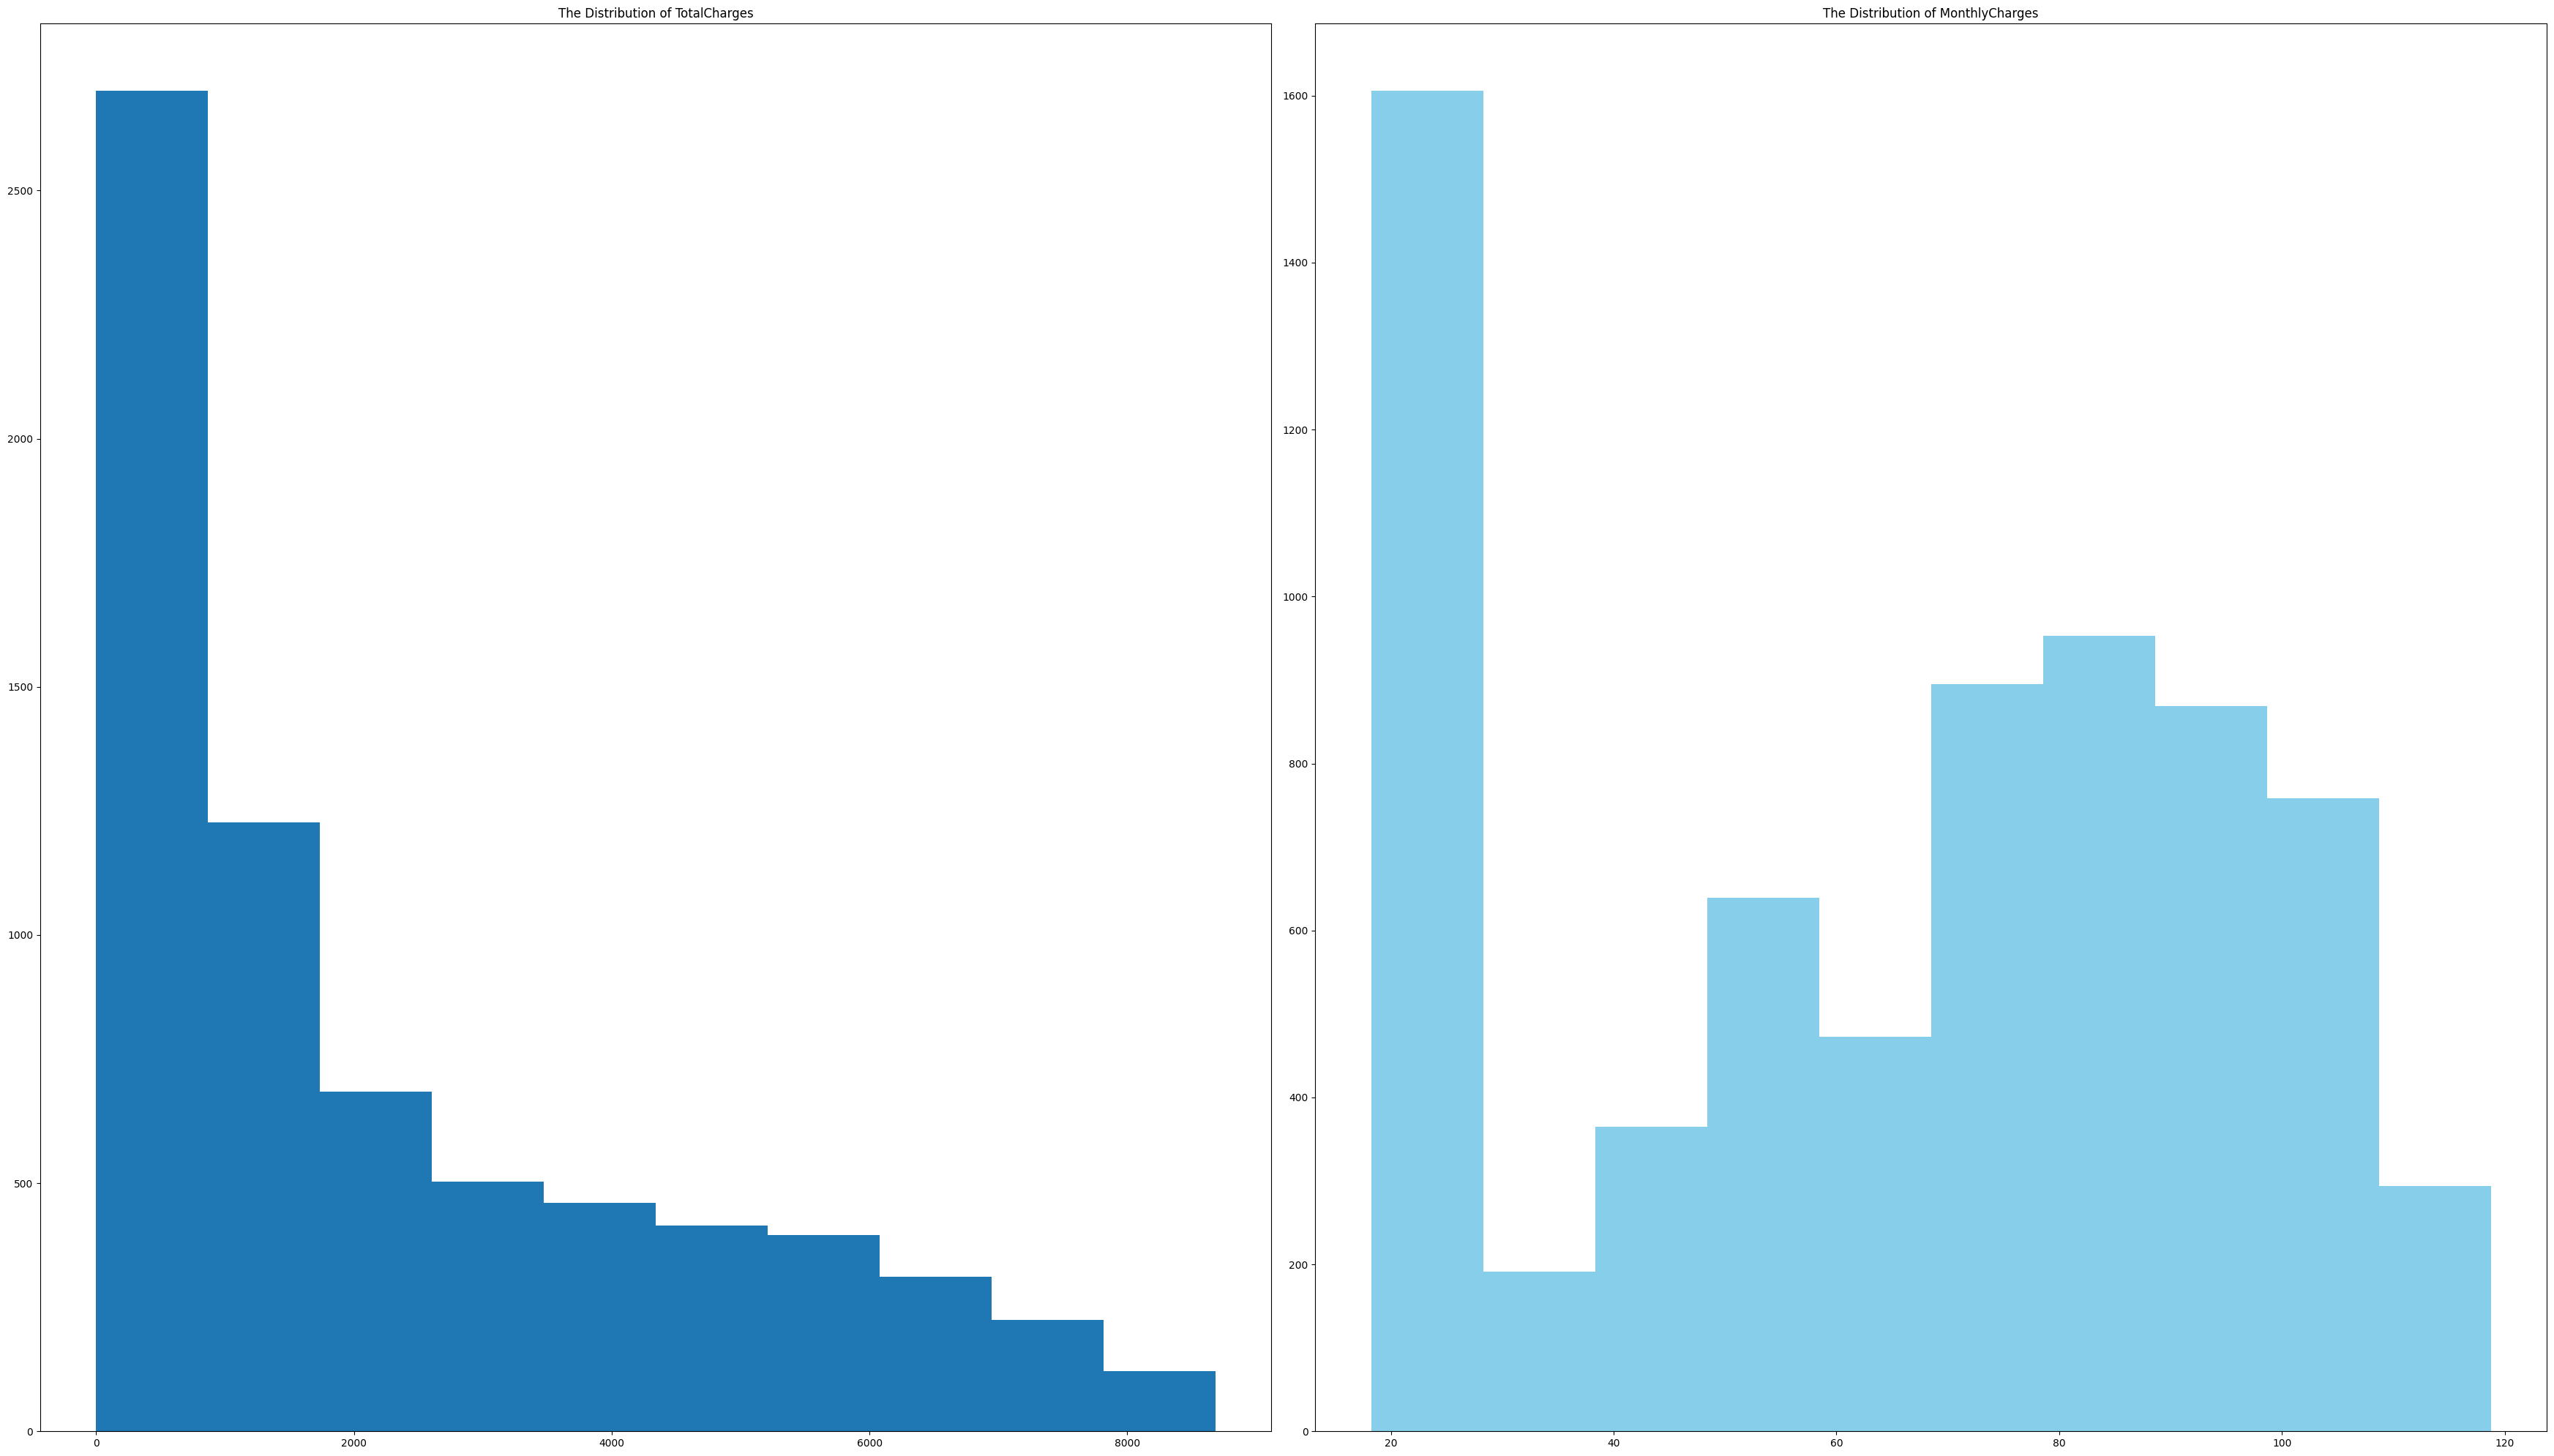

In [109]:
dist_job_mon= plt.figure(figsize=(35, 20))
ra1= dist_job_mon.add_subplot(1,2,1)
ra2= dist_job_mon.add_subplot(1,2,2)

ra1.hist(df['TotalCharges'])
ra1.set_title('The Distribution of TotalCharges')

ra2.hist(df['MonthlyCharges'], color='skyblue')
ra2.set_title('The Distribution of MonthlyCharges')
plt.tight_layout()
plt.show()

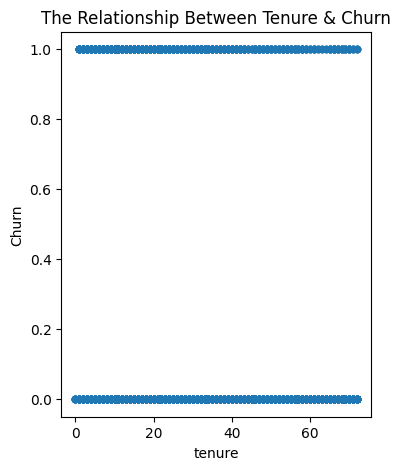

In [110]:
scatter_ten_churn=df.plot.scatter('tenure', 'Churn', figsize=(4,5))
plt.title('The Relationship Between Tenure & Churn')
plt.show()

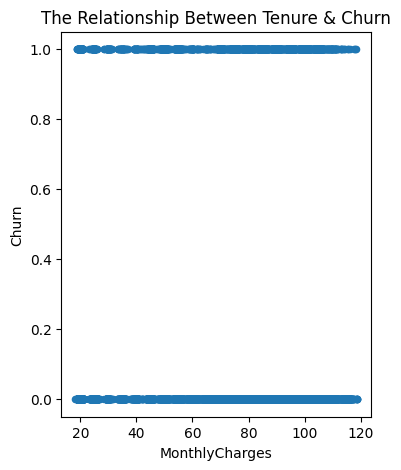

In [111]:
scatter_ten_churn=df.plot.scatter('MonthlyCharges', 'Churn', figsize=(4,5))
plt.title('The Relationship Between Tenure & Churn')
plt.show()

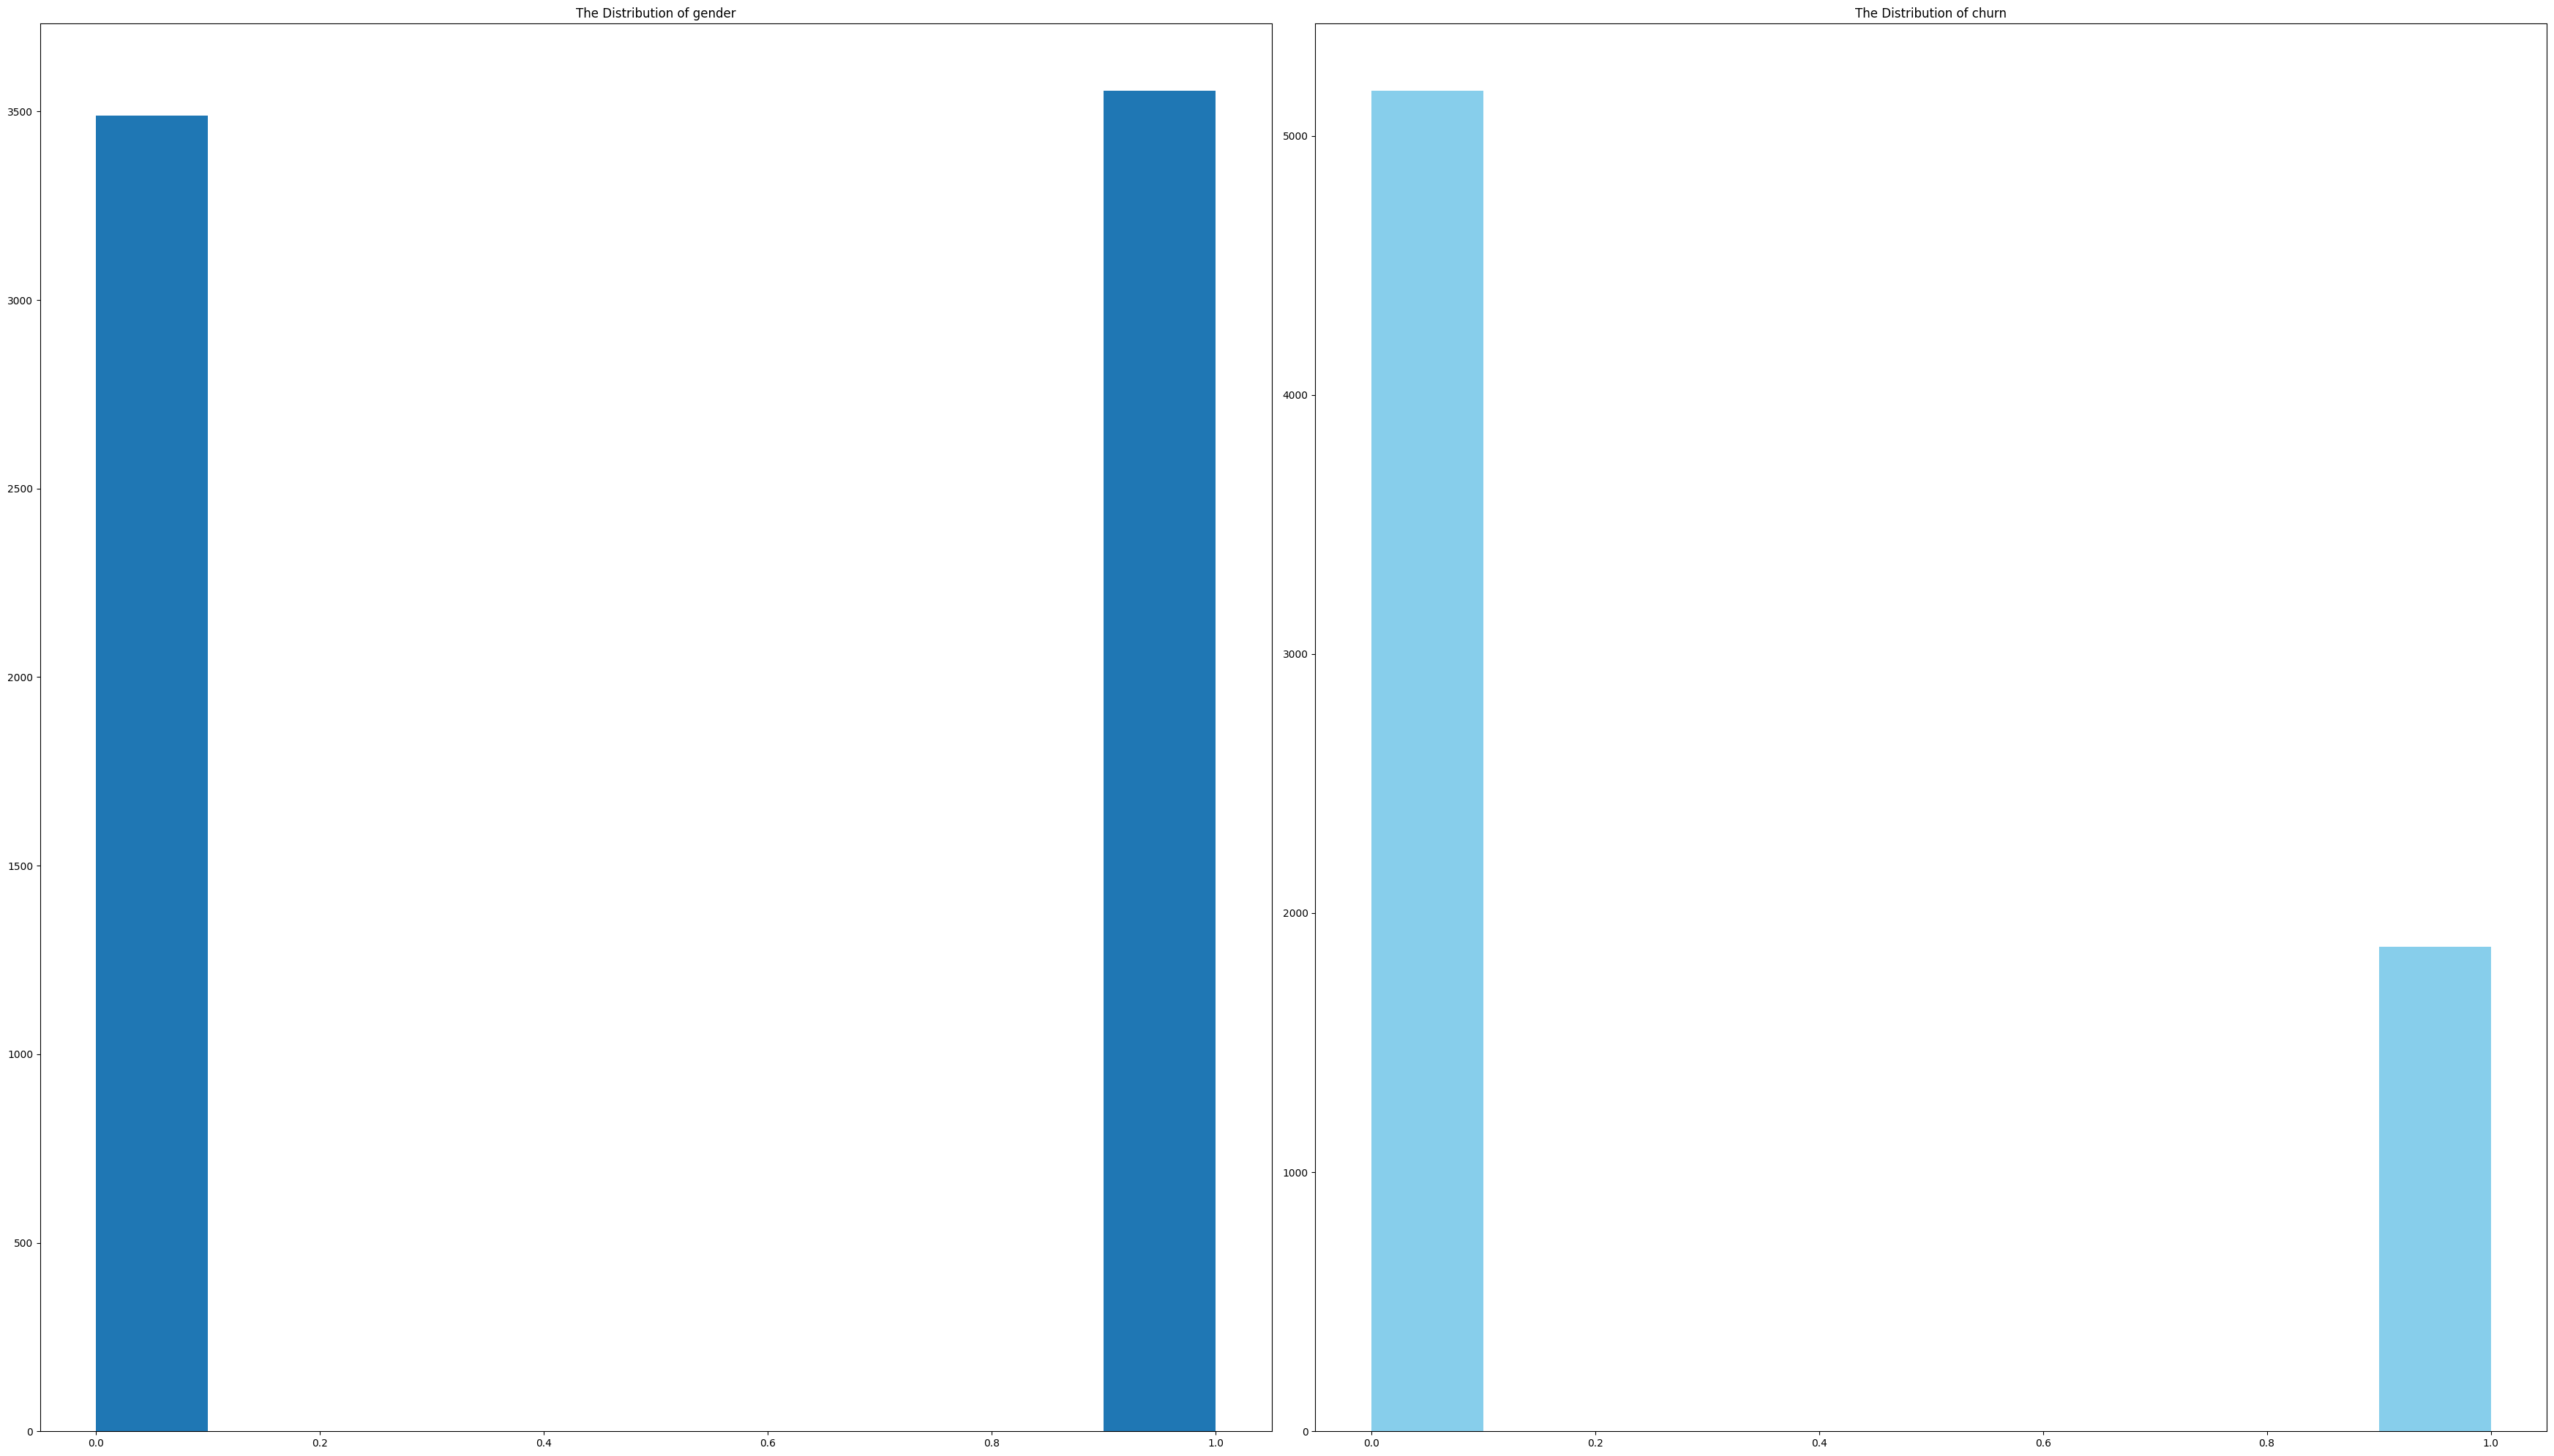

In [112]:
dist_job_mon= plt.figure(figsize=(35, 20))
ra1= dist_job_mon.add_subplot(1,2,1)
ra2= dist_job_mon.add_subplot(1,2,2)

ra1.hist(df['gender'])
ra1.set_title('The Distribution of gender')

ra2.hist(df['Churn'], color='skyblue')
ra2.set_title('The Distribution of churn')
plt.tight_layout()
plt.show()

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

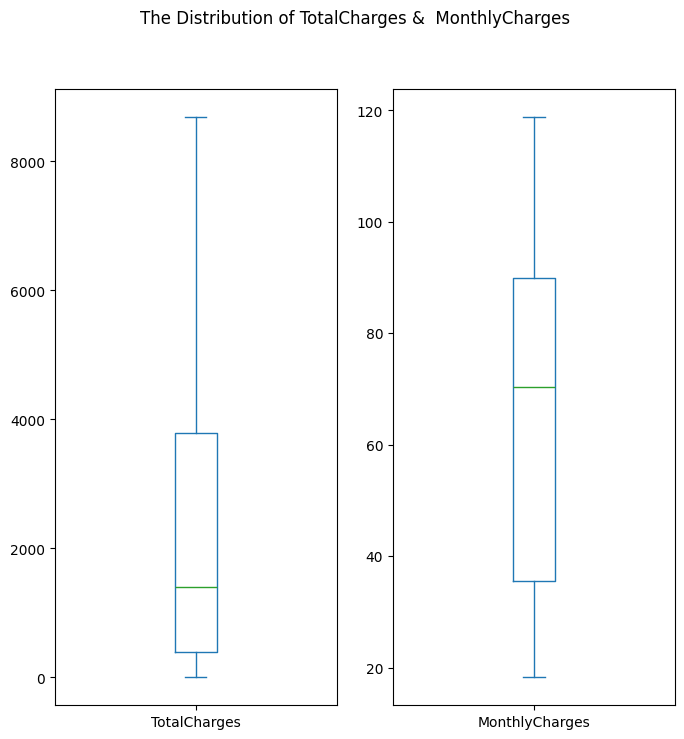

In [114]:
dist_tot_churn= df[['TotalCharges', 'MonthlyCharges']].plot(kind= 'box', figsize=(8,8), subplots= True, layout=(1,2), sharex= False, sharey= False, 
                                                   title='The Distribution of TotalCharges &  MonthlyCharges')
plt.show()

In [115]:
x=df.drop('Churn', axis= 1)
y=df['Churn']

In [116]:
df.corr()

gender  SeniorCitizen   Partner  \
gender                                   1.000000      -0.001874 -0.001808   
SeniorCitizen                           -0.001874       1.000000  0.016479   
Partner                                 -0.001808       0.016479  1.000000   
Dependents                               0.010517      -0.211185  0.452676   
tenure                                   0.005106       0.016567  0.379697   
PhoneService                            -0.006488       0.008576  0.017706   
MultipleLines                           -0.008414       0.142948  0.142057   
OnlineSecurity                          -0.017021      -0.038653  0.143106   
OnlineBackup                            -0.013773       0.066572  0.141498   
DeviceProtection                        -0.002105       0.059428  0.153786   
TechSupport                             -0.009212      -0.060625  0.119999   
StreamingTV                             -0.008393       0.105378  0.124666   
StreamingMovies                         -0.010487       0.120176  0.117412   
PaperlessBilling                        -0.011754       0.156530 -0.014877   
MonthlyCharges                          -0.014569       0.220173  0.096848   
TotalCharges                            -0.000080       0.103006  0.317504   
Churn                                   -0.008612       0.150889 -0.150448   
InternetService_DSL                      0.006568      -0.108322 -0.000851   
InternetService_Fiber optic             -0.011286       0.255338  0.000304   
InternetService_No                       0.006026      -0.182742  0.000615   
Contract_Month-to-month                 -0.003386       0.138360 -0.280865   
Contract_One year                        0.008026      -0.046262  0.082783   
Contract_Two year                       -0.003695      -0.117000  0.248091   
PaymentMethod_Bank transfer (automatic) -0.016024      -0.016159  0.110706   
PaymentMethod_Credit card (automatic)    0.001215      -0.024135  0.082029   
PaymentMethod_Electronic check           0.000752       0.171718 -0.083852   
PaymentMethod_Mailed check               0.013744      -0.153477 -0.095125   

                                         Dependents    tenure  PhoneService  \
gender                                     0.010517  0.005106     -0.006488   
SeniorCitizen                             -0.211185  0.016567      0.008576   
Partner                                    0.452676  0.379697      0.017706   
Dependents                                 1.000000  0.159712     -0.001762   
tenure                                     0.159712  1.000000      0.008448   
PhoneService                              -0.001762  0.008448      1.000000   
MultipleLines                             -0.024526  0.331941      0.279690   
OnlineSecurity                             0.080972  0.327203     -0.092893   
OnlineBackup                               0.023671  0.360277     -0.052312   
DeviceProtection                           0.013963  0.360653     -0.071227   
TechSupport                                0.063268  0.324221     -0.096340   
StreamingTV                               -0.016558  0.279756     -0.022574   
StreamingMovies                           -0.039741  0.286111     -0.032959   
PaperlessBilling                          -0.111377  0.006152      0.016505   
MonthlyCharges                            -0.113890  0.247900      0.247398   
TotalCharges                               0.062078  0.826178      0.113214   
Churn                                     -0.164221 -0.352229      0.011942   
InternetService_DSL                        0.052010  0.013274     -0.452425   
InternetService_Fiber optic               -0.165818  0.019720      0.289999   
InternetService_No                         0.139812 -0.039062      0.172209   
Contract_Month-to-month                   -0.231720 -0.645561     -0.000742   
Contract_One year                          0.068368  0.202570     -0.002791   
Contract_Two year                        

In [117]:
df.corr(method= 'spearman').tail(1)

gender  SeniorCitizen   Partner  Dependents  \
PaymentMethod_Mailed check  0.013744      -0.153477 -0.095125    0.059071   

                              tenure  PhoneService  MultipleLines  \
PaymentMethod_Mailed check -0.239293     -0.003319      -0.227206   

                            OnlineSecurity  OnlineBackup  DeviceProtection  \
PaymentMethod_Mailed check       -0.080798     -0.174164         -0.187373   

                            ...  InternetService_DSL  \
PaymentMethod_Mailed check  ...             0.041899   

                            InternetService_Fiber optic  InternetService_No  \
PaymentMethod_Mailed check                    -0.306834            0.321361   

                            Contract_Month-to-month  Contract_One year  \
PaymentMethod_Mailed check                 0.004138          -0.000116   

                            Contract_Two year  \
PaymentMethod_Mailed check          -0.004705   

                            PaymentMethod_Bank transfer (automatic)  \
PaymentMethod_Mailed check                                -0.288685   

                            PaymentMethod_Credit card (automatic)  \
PaymentMethod_Mailed check                              -0.286049   

                            PaymentMethod_Electronic check  \
PaymentMethod_Mailed check                       -0.387372   

                            PaymentMethod_Mailed check  
PaymentMethod_Mailed check                         1.0  

[1 rows x 27 columns]

In [118]:
corr= df.corr(method= 'kendall').tail(5)
corr

gender  SeniorCitizen   Partner  \
Contract_Two year                       -0.003695      -0.117000  0.248091   
PaymentMethod_Bank transfer (automatic) -0.016024      -0.016159  0.110706   
PaymentMethod_Credit card (automatic)    0.001215      -0.024135  0.082029   
PaymentMethod_Electronic check           0.000752       0.171718 -0.083852   
PaymentMethod_Mailed check               0.013744      -0.153477 -0.095125   

                                         Dependents    tenure  PhoneService  \
Contract_Two year                          0.204613  0.449402      0.003519   
PaymentMethod_Bank transfer (automatic)    0.052021  0.203409      0.007556   
PaymentMethod_Credit card (automatic)      0.060267  0.195268     -0.007721   
PaymentMethod_Electronic check            -0.150642 -0.172674      0.003062   
PaymentMethod_Mailed check                 0.059071 -0.197508     -0.003319   

                                         MultipleLines  OnlineSecurity  \
Contract_Two year                             0.106253        0.191773   
PaymentMethod_Bank transfer (automatic)       0.075527        0.095158   
PaymentMethod_Credit card (automatic)         0.060048        0.115721   
PaymentMethod_Electronic check                0.083618       -0.112338   
PaymentMethod_Mailed check                   -0.227206       -0.080798   

                                         OnlineBackup  DeviceProtection  ...  \
Contract_Two year                            0.111400          0.165096  ...   
PaymentMethod_Bank transfer (automatic)      0.087004          0.083115  ...   
PaymentMethod_Credit card (automatic)        0.090785          0.111554  ...   
PaymentMethod_Electronic check              -0.000408         -0.003351  ...   
PaymentMethod_Mailed check                  -0.174164         -0.187373  ...   

                                         InternetService_DSL  \
Contract_Two year                                   0.031714   
PaymentMethod_Bank transfer (automatic)             0.025476   
PaymentMethod_Credit card (automatic)               0.051438   
PaymentMethod_Electronic check                     -0.104418   
PaymentMethod_Mailed check                          0.041899   

                                         InternetService_Fiber optic  \
Contract_Two year                                          -0.211526   
PaymentMethod_Bank transfer (automatic)                    -0.022624   
PaymentMethod_Credit card (automatic)                      -0.050077   
PaymentMethod_Electronic check                              0.336410   
PaymentMethod_Mailed check                                 -0.306834   

                                         InternetService_No  \
Contract_Two year                                  0.218278   
PaymentMethod_Bank transfer (automatic)           -0.002113   
PaymentMethod_Credit card (automatic)              0.001030   
PaymentMethod_Electronic check                    -0.284917   
PaymentMethod_Mailed check                         0.321361   

                                         Contract_Month-to-month  \
Contract_Two year                                      -0.622633   
PaymentMethod_Bank transfer (automatic)                -0.179707   
PaymentMethod_Credit card (automatic)                  -0.204145   
PaymentMethod_Electronic check                          0.331661   
PaymentMethod_Mailed check                              0.004138   

                                         Contract_One year  Contract_Two year  \
Contract_Two year                                -0.289510           1.000000   
PaymentMethod_Bank transfer (automatic)           0.057451           0.154471   
PaymentMethod_Credit card (automatic)             0.067589           0.173265   
PaymentMethod_Electronic check                   -0.109130          -0.282138   
PaymentMethod_Mailed check                       -0.000116          -0.004705   

                                         PaymentMethod_Bank transfer (automatic)

In [119]:
plt.figure(figsize=(30,6))
sns.heatmap(corr, annot= True)

<Axes: >

In [120]:
 # select top k features ranked based method
# Relationship between independent variable and dependt variable showing

from sklearn.feature_selection import mutual_info_classif

array4= mutual_info_classif(x,y)
s3= pd.Series(array4, index=x.columns)
print(s3)
s3.sort_values().plot(kind= 'bar')


# 0 showing impact columns can delete that work here

gender                                     0.000000
SeniorCitizen                              0.005155
Partner                                    0.012667
Dependents                                 0.013208
tenure                                     0.079744
PhoneService                               0.000000
MultipleLines                              0.000000
OnlineSecurity                             0.018732
OnlineBackup                               0.000000
DeviceProtection                           0.001148
TechSupport                                0.013473
StreamingTV                                0.011895
StreamingMovies                            0.000000
PaperlessBilling                           0.022898
MonthlyCharges                             0.042786
TotalCharges                               0.043184
InternetService_DSL                        0.006733
InternetService_Fiber optic                0.049396
InternetService_No                         0.032417
Contract_Mon

<Axes: >

In [121]:
from sklearn.feature_selection import f_classif
f_stats, p_val=f_classif(x,y)
annova_df= pd.DataFrame({'f-stats-values': f_stats, 'p_values': np.around(p_val, 4)}, index=x.columns)

print(annova_df)
print('*'*20)

print('Here below default showing Alternatvie Hypotheisi means having related with target')



                                         f-stats-values  p_values
gender                                         0.522257    0.4699
SeniorCitizen                                164.041424    0.0000
Partner                                      163.060036    0.0000
Dependents                                   195.149314    0.0000
tenure                                       997.268010    0.0000
PhoneService                                   1.004266    0.3163
MultipleLines                                 11.341439    0.0008
OnlineSecurity                               212.666199    0.0000
OnlineBackup                                  47.962955    0.0000
DeviceProtection                              30.954780    0.0000
TechSupport                                  196.255405    0.0000
StreamingTV                                   28.261124    0.0000
StreamingMovies                               26.628665    0.0000
PaperlessBilling                             268.985218    0.0000
MonthlyCha

In [122]:
from sklearn.feature_selection import VarianceThreshold
var_thr= VarianceThreshold(threshold= 0.0)
var_thr.fit_transform(x)
var_thr.get_support()


x.var()

gender                                     2.500129e-01
SeniorCitizen                              1.358745e-01
Partner                                    2.497476e-01
Dependents                                 2.098649e-01
tenure                                     6.031681e+02
PhoneService                               8.746938e-02
MultipleLines                              2.439252e-01
OnlineSecurity                             2.045183e-01
OnlineBackup                               2.259703e-01
DeviceProtection                           2.256609e-01
TechSupport                                2.060204e-01
StreamingTV                                2.366594e-01
StreamingMovies                            2.374680e-01
PaperlessBilling                           2.415299e-01
MonthlyCharges                             9.054109e+02
TotalCharges                               5.138357e+06
InternetService_DSL                        2.256166e-01
InternetService_Fiber optic                2.463

In [123]:
var_thr= VarianceThreshold(threshold= 0.4)
var_thr.fit_transform(x)
var_thr.get_support()

print(x.var())

gender                                     2.500129e-01
SeniorCitizen                              1.358745e-01
Partner                                    2.497476e-01
Dependents                                 2.098649e-01
tenure                                     6.031681e+02
PhoneService                               8.746938e-02
MultipleLines                              2.439252e-01
OnlineSecurity                             2.045183e-01
OnlineBackup                               2.259703e-01
DeviceProtection                           2.256609e-01
TechSupport                                2.060204e-01
StreamingTV                                2.366594e-01
StreamingMovies                            2.374680e-01
PaperlessBilling                           2.415299e-01
MonthlyCharges                             9.054109e+02
TotalCharges                               5.138357e+06
InternetService_DSL                        2.256166e-01
InternetService_Fiber optic                2.463

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [161]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state= 22, stratify= y)

y_train.value_counts()

Churn
0    3880
1    1402
Name: count, dtype: int64

In [162]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [163]:
print(3880/ (3880 + 1402)) # y_train_values
print(5174 / (5174 + 1869))
        # >>> Here perfectly fitted data not change during curtain values counts of y on if we random_state changes>>

print('*'*20)

0.7345702385460053
0.7346301292063041
********************


In [164]:
print(y_test.value_counts())
1294 / (467 +1294)

Churn
0    1294
1     467
Name: count, dtype: int64


0.7348097671777399

In [165]:
logistic_clf= LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

In [166]:
# This is imbalanced data training Evaluations
y_pred_train= logistic_clf.predict(x_train)
cnf_matrix= confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix of Training Evaluations:\n', cnf_matrix)
print('*'*40)
accuracy =accuracy_score(y_train, y_pred_train)
print('Accuracy:', accuracy)
print('*'*20)
clf_report= classification_report(y_train, y_pred_train)
print('Classification report:\n', clf_report)

Confusion Matrix of Training Evaluations:
 [[3479  401]
 [ 637  765]]
****************************************
Accuracy: 0.8034835289663006
********************
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      3880
           1       0.66      0.55      0.60      1402

    accuracy                           0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.80      0.80      0.80      5282



In [167]:
# This is imbalnced data testing evaluations

y_pred_test=logistic_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test, y_pred_test)
print("classification report:\n", clf_report) 

Confusion Matrix of Testing Evaltuations: 
 [[1170  124]
 [ 214  253]]
****************************************
Accuracy: 0.8080636002271436
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.67      0.54      0.60       467

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [168]:
y_pred_test_prob= logistic_clf.predict_proba(x_test)[:,1]
print(y_pred_test_prob[20:40])

[0.01230651 0.22335969 0.52026662 0.67245594 0.24823992 0.75682676
 0.41346041 0.39848735 0.0723639  0.24003557 0.28581312 0.64509134
 0.41835009 0.18545503 0.12672593 0.01813962 0.15983604 0.02042737
 0.18321212 0.0119239 ]


In [169]:
y_pred_test[20:40]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [170]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [172]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

random_oversampler= RandomOverSampler(sampling_strategy= 0.9, random_state=22)
x_sampled, y_sampled= random_oversampler.fit_resample(x,y)

print(y_sampled.value_counts())
x_train_samp, x_test_samp, y_train_samp, y_test_samp= train_test_split(x_sampled, y_sampled, test_size=0.25, random_state=22)
print(x.shape)
print(y.shape)
print('*'*20)
logistic_clf_r= LogisticRegression()
logistic_clf_r.fit(x_train_samp, y_train_samp)

Churn
0    5174
1    4656
Name: count, dtype: int64
(7043, 26)
(7043,)
********************


LogisticRegression()

In [173]:
# This is balnced data training evaluations

y_pred_train_samp=logistic_clf_r.predict(x_train_samp)
cnf_matrix=confusion_matrix(y_train_samp, y_pred_train_samp)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train_samp, y_pred_train_samp)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train_samp, y_pred_train_samp)
print("Classificaiton report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[2886  989]
 [ 772 2725]]
****************************************
Accuracy: 0.7611231687466088
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      3875
           1       0.73      0.78      0.76      3497

    accuracy                           0.76      7372
   macro avg       0.76      0.76      0.76      7372
weighted avg       0.76      0.76      0.76      7372



In [174]:
# This is balnced data training evaluations

y_pred_test_samp=logistic_clf_r.predict(x_test_samp)
cnf_matrix=confusion_matrix(y_test_samp, y_pred_test_samp)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_test_samp, y_pred_test_samp)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_test_samp, y_pred_test_samp)
print("Classificaiton report:\n", clf_report)

#just for checking finally fixed with SMOTE bcz if drop.duplicate sombody wrote then mishandling will again occurs

confusion Matrix of Training Evaluations:
 [[981 318]
 [238 921]]
****************************************
Accuracy: 0.7737998372660699
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1299
           1       0.74      0.79      0.77      1159

    accuracy                           0.77      2458
   macro avg       0.77      0.77      0.77      2458
weighted avg       0.78      0.77      0.77      2458



In [176]:
#Feature Scalling added 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

normal_scaler=MinMaxScaler()
array=normal_scaler.fit_transform(x)
x=pd.DataFrame(array, columns=x.columns)
smote=SMOTE(sampling_strategy=0.9, k_neighbors=40)   #Backed Run KNeighbor Algorithm
x_sampled_, y_sampled_=smote.fit_resample(x,y)
print(y_sampled_.value_counts())
print("*"* 20)
x_train_samp_, x_test_samp_, y_train_samp_, y_test_samp_=train_test_split(x_sampled_,y_sampled_, test_size=0.25, random_state=22, stratify= y_sampled) 

print(x.shape)
print(y.shape)
print("*"*20)
logistic_clf_m=LogisticRegression()
logistic_clf_m.fit(x_train_samp_, y_train_samp_)
# This is balnced data training evaluations
# This is balnced data training evaluations

y_pred_train_samp_=logistic_clf_m.predict(x_train_samp_)
cnf_matrix=confusion_matrix(y_train_samp_, y_pred_train_samp_)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train_samp_, y_pred_train_samp_)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train_samp_, y_pred_train_samp_)
print("Classificaiton report:\n", clf_report)

# This is balnced data testing evaluations

y_pred_test_samp_=logistic_clf_m.predict(x_test_samp_)
cnf_matrix=confusion_matrix(y_test_samp_, y_pred_test_samp_)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_test_samp_, y_pred_test_samp_)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_test_samp_, y_pred_test_samp_)
print("Classificaiton report:\n", clf_report)

Churn
0    5174
1    4656
Name: count, dtype: int64
********************
(7043, 26)
(7043,)
********************
confusion Matrix of Training Evaluations:
 [[2949  931]
 [ 719 2773]]
****************************************
Accuracy: 0.7761801410743353
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      3880
           1       0.75      0.79      0.77      3492

    accuracy                           0.78      7372
   macro avg       0.78      0.78      0.78      7372
weighted avg       0.78      0.78      0.78      7372

confusion Matrix of Training Evaluations:
 [[1001  293]
 [ 217  947]]
****************************************
Accuracy: 0.7925142392188771
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      1294
           1       0.76      0.81      0.79      1164

    accuracy              

In [139]:
from sklearn.feature_selection import SequentialFeatureSelector

# logistic_clf_m= LogisticRegression()  previously smote time trained 

forward_sfs= SequentialFeatureSelector(estimator= logistic_clf_m, n_features_to_select= 6, direction= 'forward', 
                         cv= 5, n_jobs= -1)

forward_sfs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=6, n_jobs=-1)

In [140]:
forward_sfs.get_feature_names_out()

array(['gender', 'tenure', 'PhoneService', 'StreamingMovies',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check'],
      dtype=object)

In [141]:
from mlxtend.feature_selection import SequentialFeatureSelector
# from sklearn.feature_selection import SequentialFeatureSelector

# logistic_clf_m=LogisticRegression()  #previously trained 
forward_sfs_t=SequentialFeatureSelector(estimator= logistic_clf_m,
                                      cv= 8, scoring= None, n_jobs= -1)

forward_sfs_t.fit(x,y)

SequentialFeatureSelector(cv=8, estimator=LogisticRegression(),
                          k_features=(1, 1), n_jobs=-1, scoring='accuracy')

In [142]:
pd.DataFrame(forward_sfs_t.subsets_).T

feature_idx                                          cv_scores avg_score  \
1        (0,)  [0.7343927355278093, 0.7343927355278093, 0.734...   0.73463   

  feature_names  
1     (gender,)

In [143]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
# from sklearn.feature_selection import ExhaustiveFeatureSelector

# logistic_clf_m= LogisticRegression()   # previously taken trained on smote time
efs= ExhaustiveFeatureSelector(estimator= logistic_clf_m, print_progress= True, 
                      scoring= 'accuracy', cv= 5,n_jobs= -1)
efs.fit(x,y)

Features: 26/26

ExhaustiveFeatureSelector(estimator=LogisticRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12], [13],
                                          [14], [15], [16], [17], [18], [19],
                                          [20], [21], [22], [23], [24], [25]],
                          n_jobs=-1)

In [144]:
efs.best_feature_names_

('gender',)

In [145]:
efs.best_score_

np.float64(0.7346301575908123)

In [146]:
from sklearn.feature_selection import RFE

rfe= RFE(estimator= logistic_clf_m, n_features_to_select= 5, verbose= 1 )
rfe.fit(x,y)
rfe.get_feature_names_out()

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


array(['tenure', 'TotalCharges', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month'], dtype=object)

In [147]:
y_pred_train_prob= logistic_clf_m.predict_proba(x_train)[:,1]
y_pred_train[20:40]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
fpr[20:40]


In [ ]:
tpr[20:40]

In [ ]:
threshold[]

In [ ]:
# It help to find perfect threshold for insted of picking randomely time consuming 


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC CURVE')
plt.show()

In [149]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
px.line(x=fpr, y=tpr, labels={'x':"False Positive Rate{FPR}', 'y':'True Positive Rate(TPR)'})

In [ ]:
np.where(tpr>=[0.8589496])[0][0]
print(fpr[5834])
print(tpr[5834])
threshold[5834]

In [ ]:
y_pred_train=logistic_reg.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cnf_matrix)

print("*"* 40)
accuracy=accuracy_score(y_train,  y_pred_train)
print("Accuracy:", accuracy)
print("*"* 40)
clf_report=classification_report(y_train, y_pred_train)
print("classification report: \n", clf_report)


print("*"*70)


y_pred_test=logistic_reg.predict(x_test)
cnf_matrix=confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test, y_pred_test)
print("classification report:\n", clf_report)

In [ ]:
roc_auc_score(y_train, y_pred_train_prob)

In [ ]:
logistic_reg.coef_

### SAVE MODEL

In [151]:
import pickle


with open('x_y.model.pkl', 'wb') as f:
    pickle.dump((x,y), f)